### GEO 398D-1 Machine Learning in Geosciences Project

>> GOAL: To predict carbon emission in Rwanda

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

## Import Data (Training Dataset)

In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data_copy = train_data.copy()

In [6]:
train_data_copy.head().T

0  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2019_00   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2019   
week_no                                            0   
...                                              ...   
Cloud_sensor_azimuth_angle                -12.628986   
Cloud_sensor_zenith_angle                  35.632416   
Cloud_solar_azimuth_angle                -138.786423   
Cloud_solar_zenith_angle                    30.75214   
emission                                    3.750994   

                                                   1  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2019_01   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2019   
week_no                                            1   
...                                              ...   
Cloud_sensor_azimuth_angle                 30.359375   
Cloud_sensor_zenith_angle                  39.557633   
Cloud_solar_azimuth_angle                 -145.18393   
Cloud_solar_zenith_angle                   27.251779   
emission                                    4.025176   

                                                   2  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2019_02   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2019   
week_no                                            2   
...                                              ...   
Cloud_sensor_azimuth_angle                 15.377883   
Cloud_sensor_zenith_angle                  30.401823   
Cloud_solar_azimuth_angle                -142.519545   
Cloud_solar_zenith_angle                   26.193296   
emission                                    4.231381   

                                                   3                         4  
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2019_03  ID_-0.510_29.290_2019_04  
latitude                                       -0.51                     -0.51  
longitude                                      29.29                     29.29  
year                                            2019                      2019  
week_no                                            3                         4  
...                                              ...                       ...  
Cloud_sensor_azimuth_angle                -11.293399                 38.532263  
Cloud_sensor_zenith_angle                  24.380357                 37.392979  
Cloud_solar_azimuth_angle                -132.665828               -141.509805  
Cloud_solar_zenith_angle                   28.829155                 22.204612  
emission                                    4.305286                  4.347317  

[76 rows x 5 columns]

In [7]:
train_data.describe()

latitude     longitude          year       week_no  \
count  79023.000000  79023.000000  79023.000000  79023.000000   
mean      -1.891072     29.880155   2020.000000     26.000000   
std        0.694522      0.810375      0.816502     15.297155   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.451000     29.262000   2019.000000     13.000000   
50%       -1.882000     29.883000   2020.000000     26.000000   
75%       -1.303000     30.471000   2021.000000     39.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              64414.000000   
mean                                   0.000048   
std                                    0.000272   
min                                   -0.000996   
25%                                   -0.000096   
50%                                    0.000024   
75%                                    0.000153   
max                                    0.004191   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  64414.000000   
mean                                       0.834848   
std                                        0.185382   
min                                        0.241822   
25%                                        0.705817   
50%                                        0.809118   
75%                                        0.942792   
max                                        1.885239   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    64414.000000   
mean                                         0.000035   
std                                          0.000206   
min                                         -0.000887   
25%                                         -0.000078   
50%                                          0.000019   
75%                                          0.000121   
max                                          0.004236   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   64414.000000                         64414.000000   
mean                        0.158418                            -7.925870   
std                         0.071364                            64.263368   
min                         0.000000                          -179.537059   
25%                         0.110535                           -56.782383   
50%                         0.161855                           -12.441726   
75%                         0.211824                            72.059990   
max                         0.299998                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        64414.000000  ...            78539.000000   
mean                            37.436189  ...             5592.377478   
std                             14.149950  ...             1428.503002   
min                              0.099237  ...             1050.661782   
25%                             28.844520  ...             4595.400519   
50%                             37.784299  ...             5573.854309   
75%                             47.634875  ...             6542.303642   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               78539.000000             78539.000000   
mean                59420.297456              4670.430869   
std                  9051.163609              1359.251583   
min                 24779.033704              1050.496816   
25%                 53175.779928              3680.856344   
50%                 59332.532548              4621.755170   
75%                 65663.842684              5572.983223   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [9]:
train_data.shape, train_data.size

((79023, 76), 6005748)

## EXPLORATORY DATA ANALYSIS

In [10]:
train_data.isna().sum()  # check for missing values

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

In [11]:
import missingno as msno # We used missigno to visualize missing data

<Axes: >

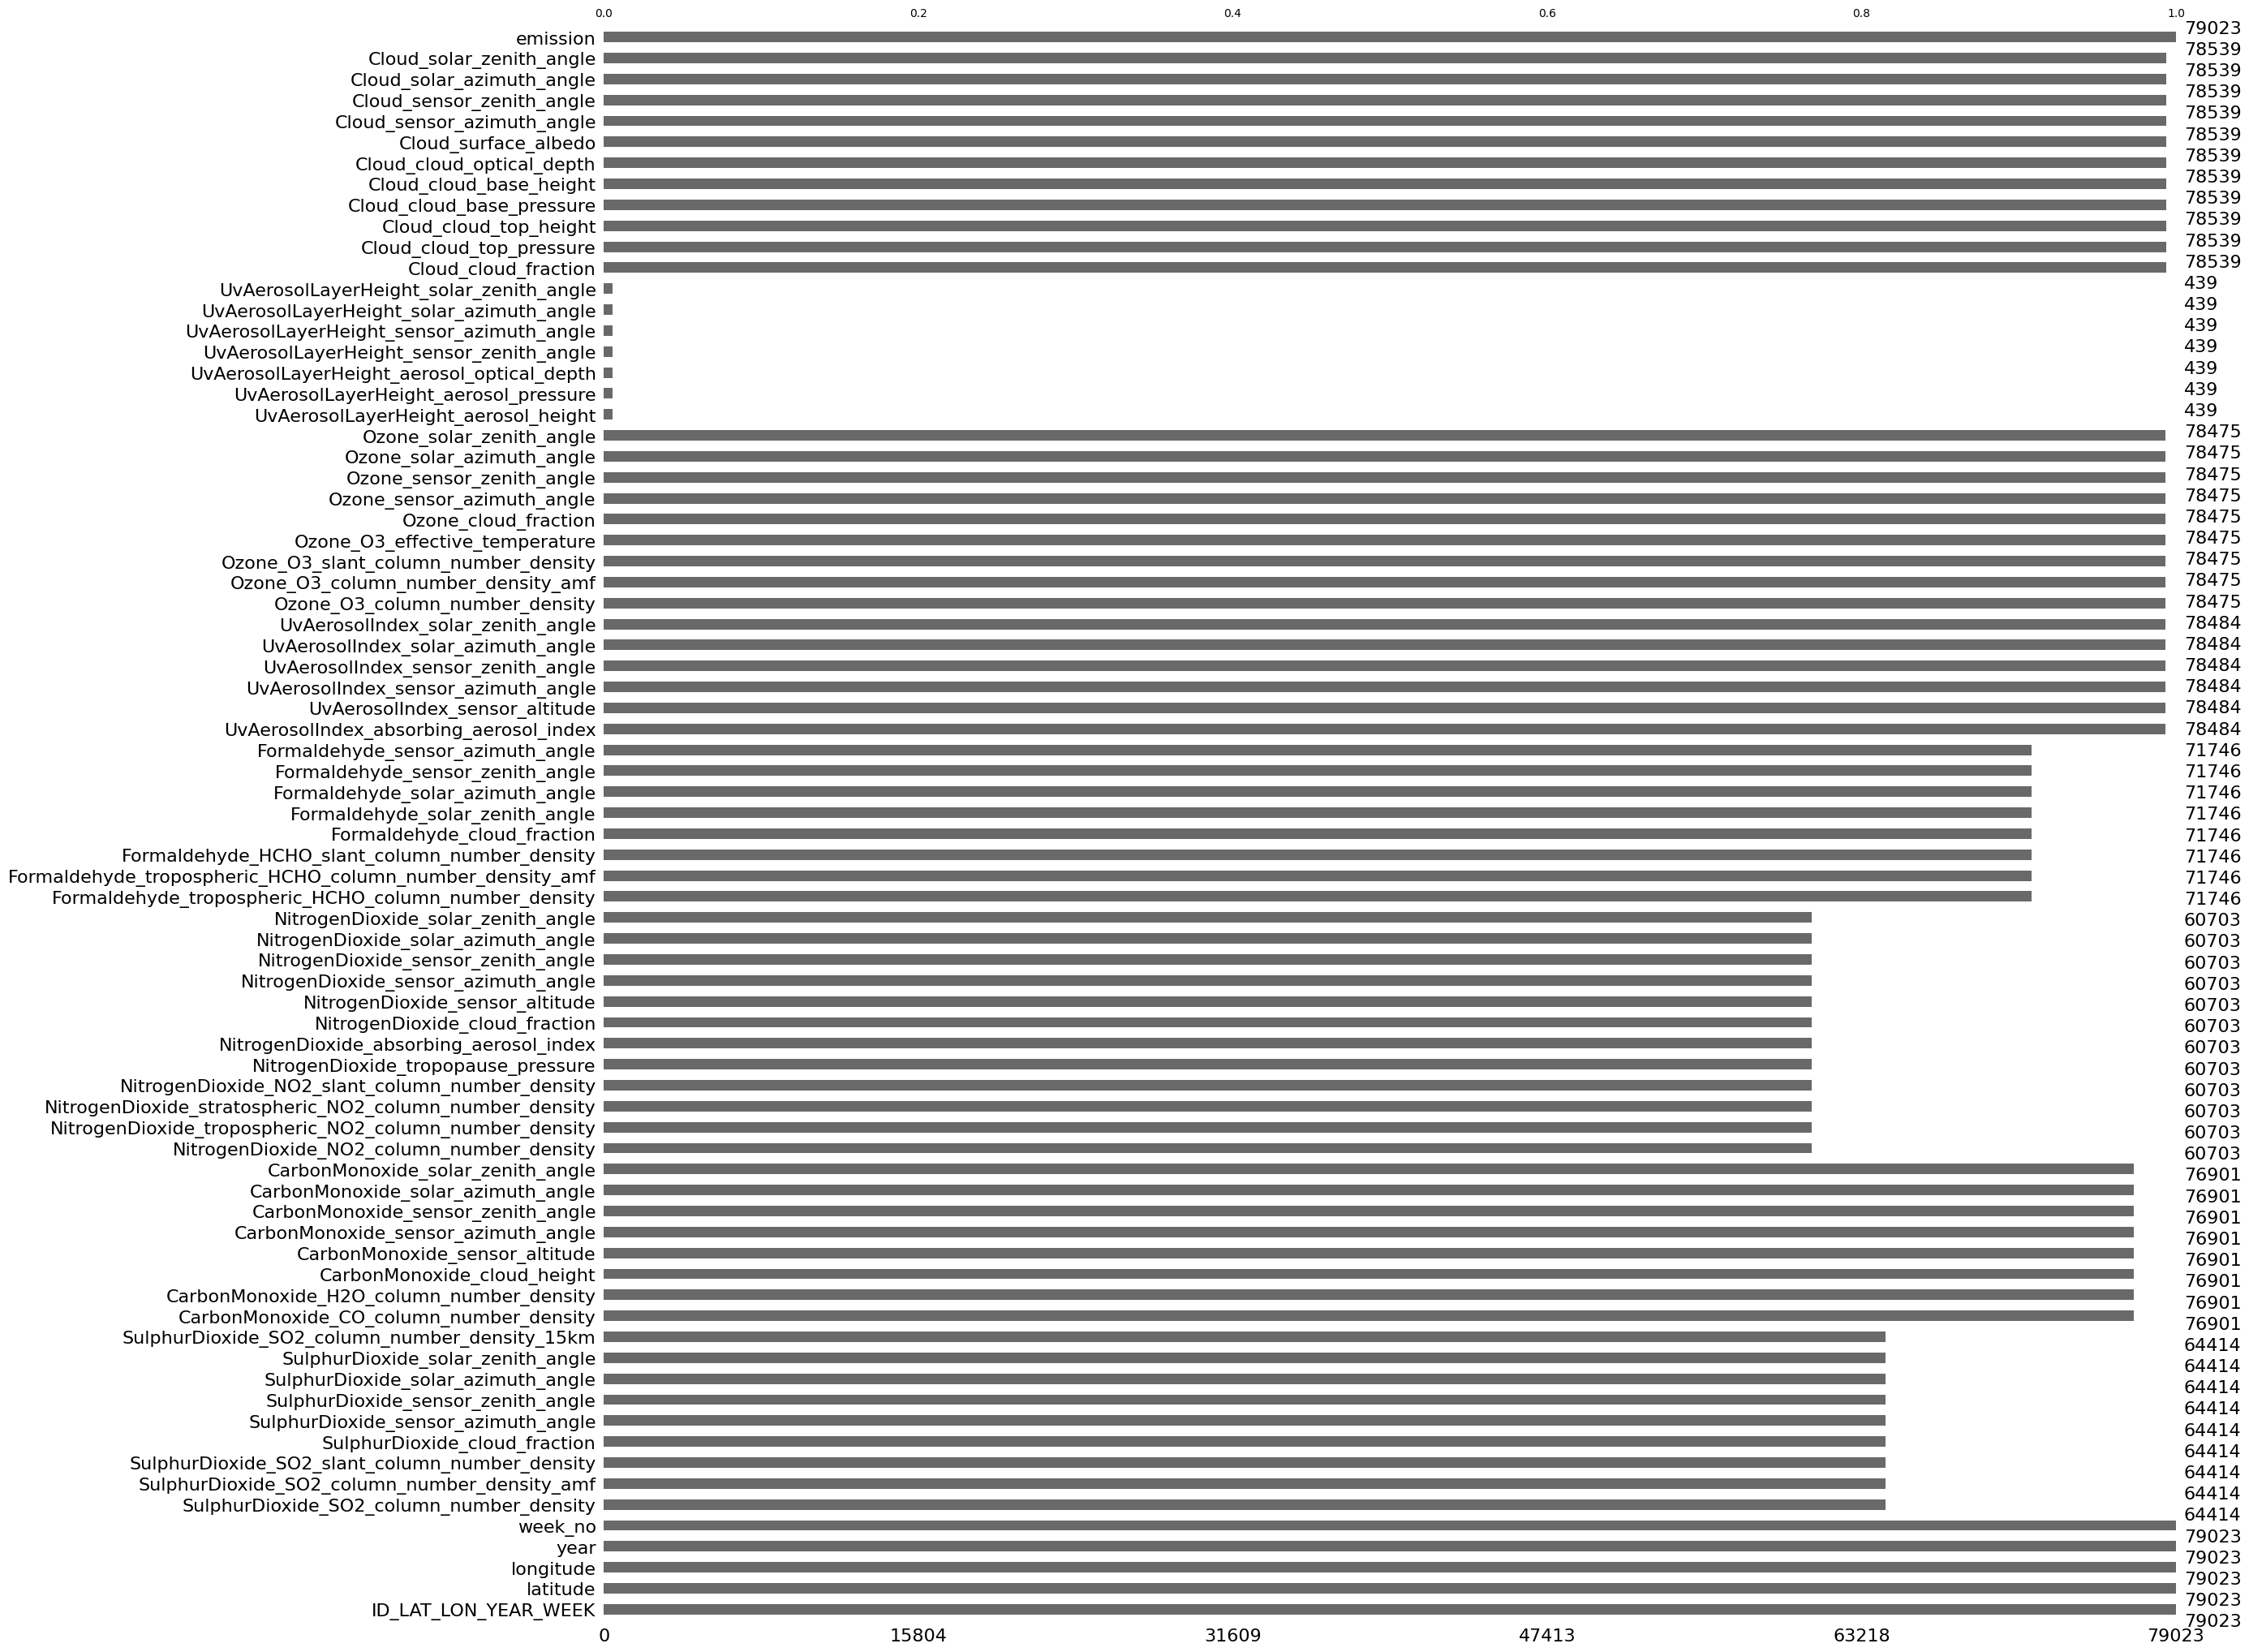

In [12]:
msno.bar(train_data)

In [13]:
# convert missing data info. into a dataframe
missing_data = train_data.isna().sum()
missing_data = pd.DataFrame({'Missing_Count': missing_data}, index=missing_data.index)
missing_data.head(10)

Missing_Count
ID_LAT_LON_YEAR_WEEK                                        0
latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                14609
SulphurDioxide_SO2_column_number_density_amf            14609
SulphurDioxide_SO2_slant_column_number_density          14609
SulphurDioxide_cloud_fraction                           14609
SulphurDioxide_sensor_azimuth_angle                     14609

In [14]:
#Remove columns with very high missing values > 70000
train_data.drop(list(missing_data.loc[missing_data['Missing_Count']>70000].index), axis = 1, inplace=True)
train_data.drop(columns='ID_LAT_LON_YEAR_WEEK',axis=1, inplace=True)
train_data_copy.drop(columns='ID_LAT_LON_YEAR_WEEK',axis=1, inplace=True)

In [15]:
# Check the shape of the original training dataframe and the 
# treated dataframe that we've dropped certain columns with very high missing values > 80%
train_data.shape, train_data_copy.shape

((79023, 68), (79023, 75))

## NOTE: 7 columns dropped

In [16]:
dropped_cols = missing_data.loc[missing_data['Missing_Count'] > 70000].index
dropped_cols

Index(['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle'],
      dtype='object')

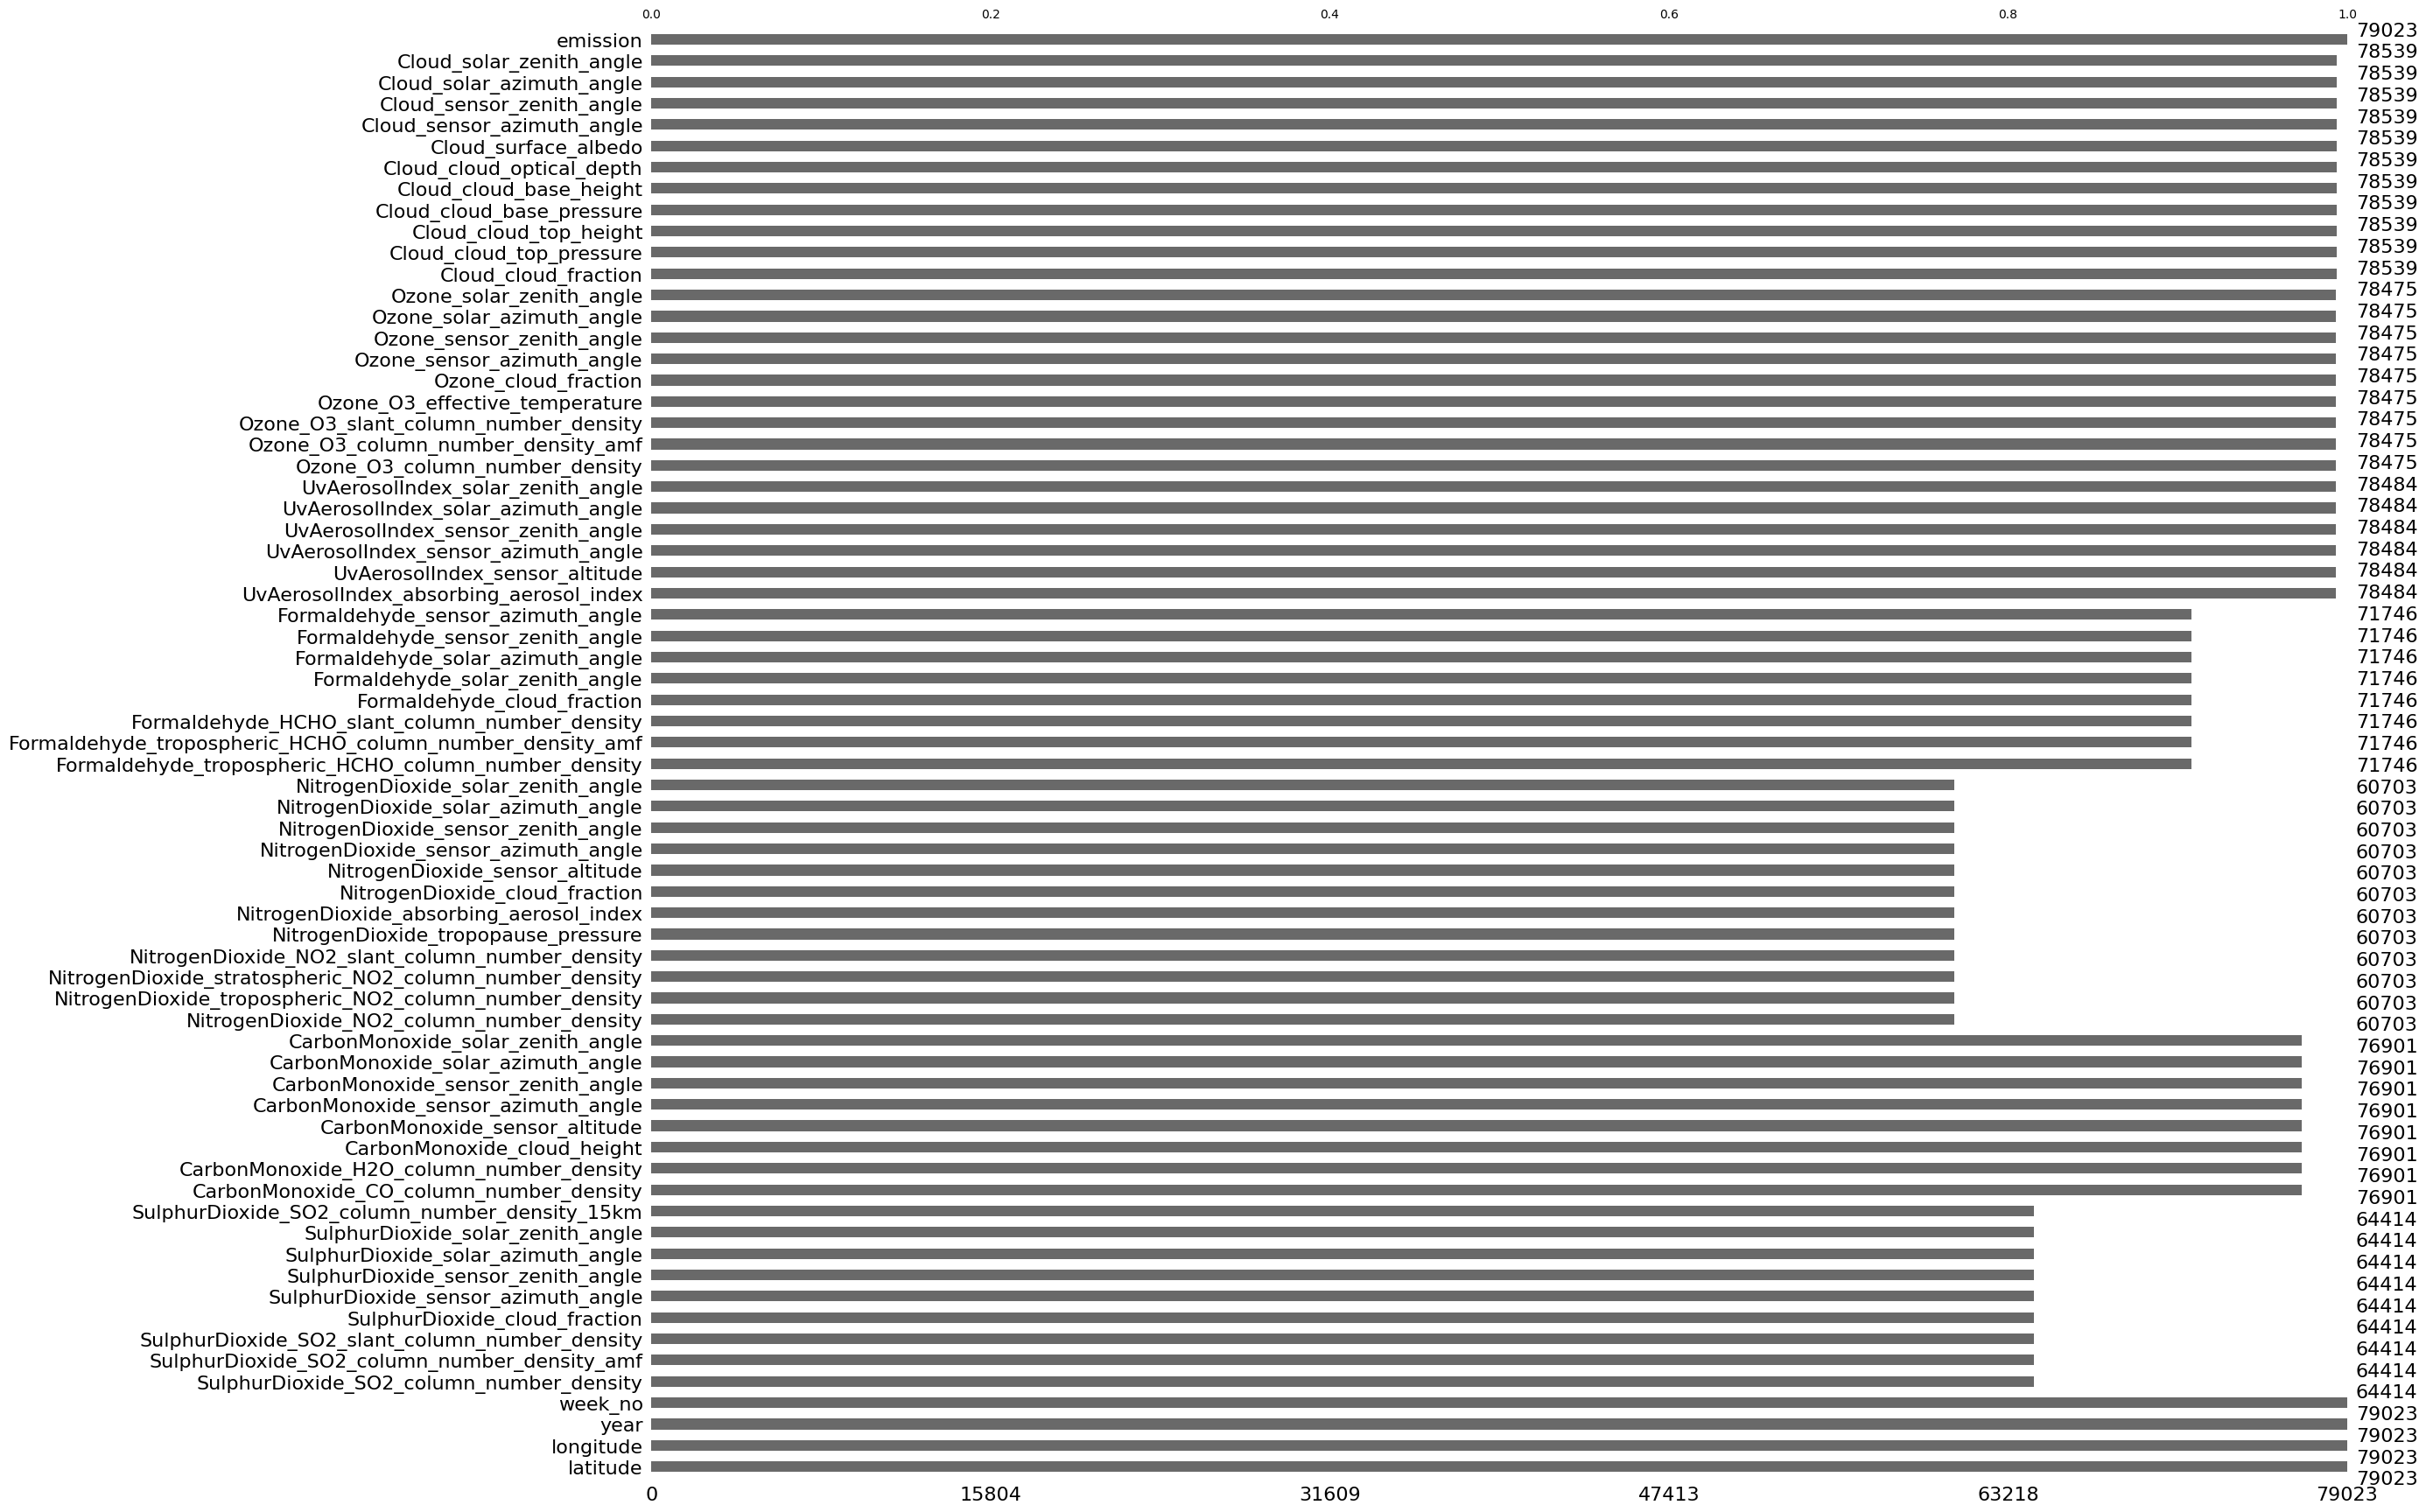

In [17]:
# visualize missing data after dropping the 7 features
msno.bar(train_data);

# correlation matrix

- Given the high dimensionality of the features, we sampled 10 features plus the label to observe correlations amongst features and how different features correlate with the target

<Axes: >

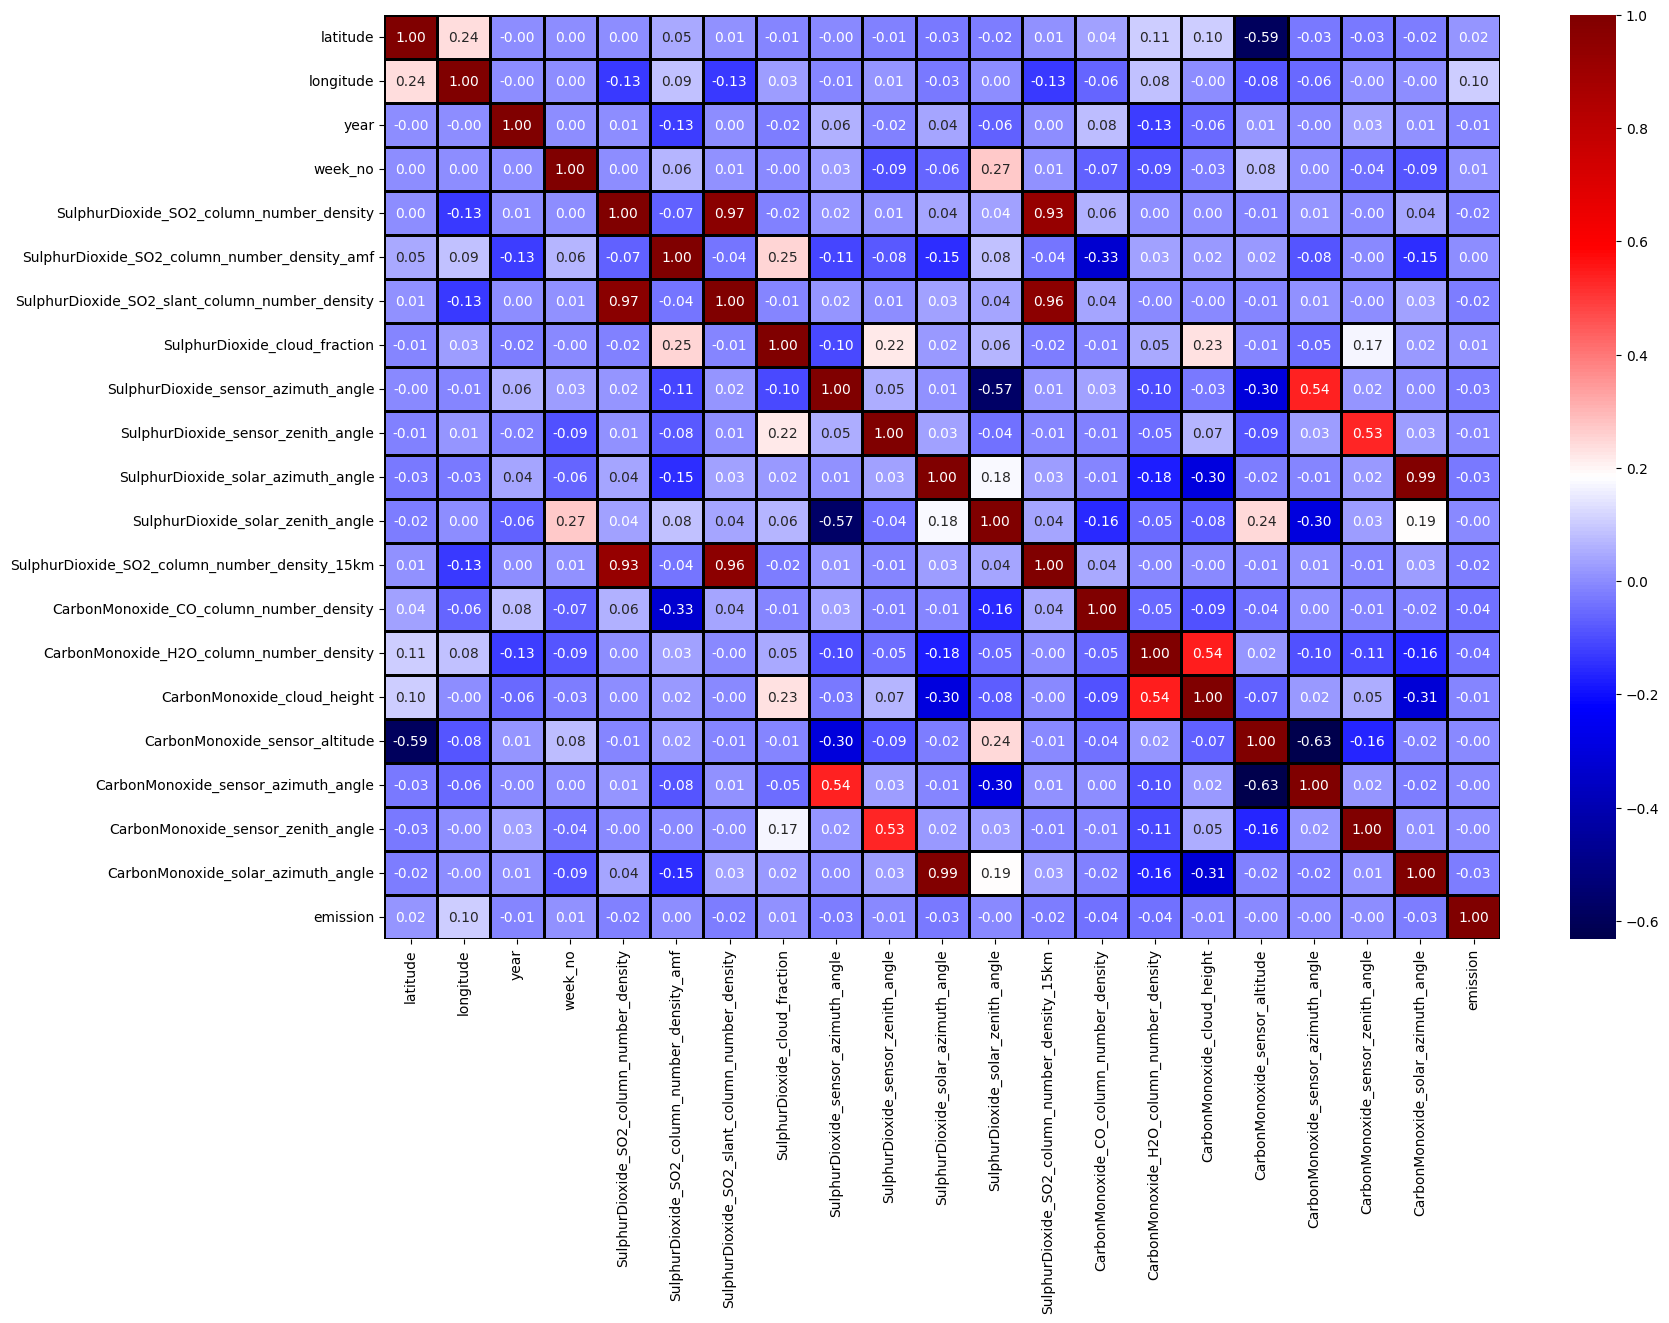

In [18]:
fig, ax =plt.subplots(figsize=(18,12))
sb.heatmap(train_data[train_data.columns[:20].tolist() + [train_data.columns[-1]]].corr(), 
           linewidths=1, linecolor='black', cmap='seismic', annot=True, fmt = '.2f')

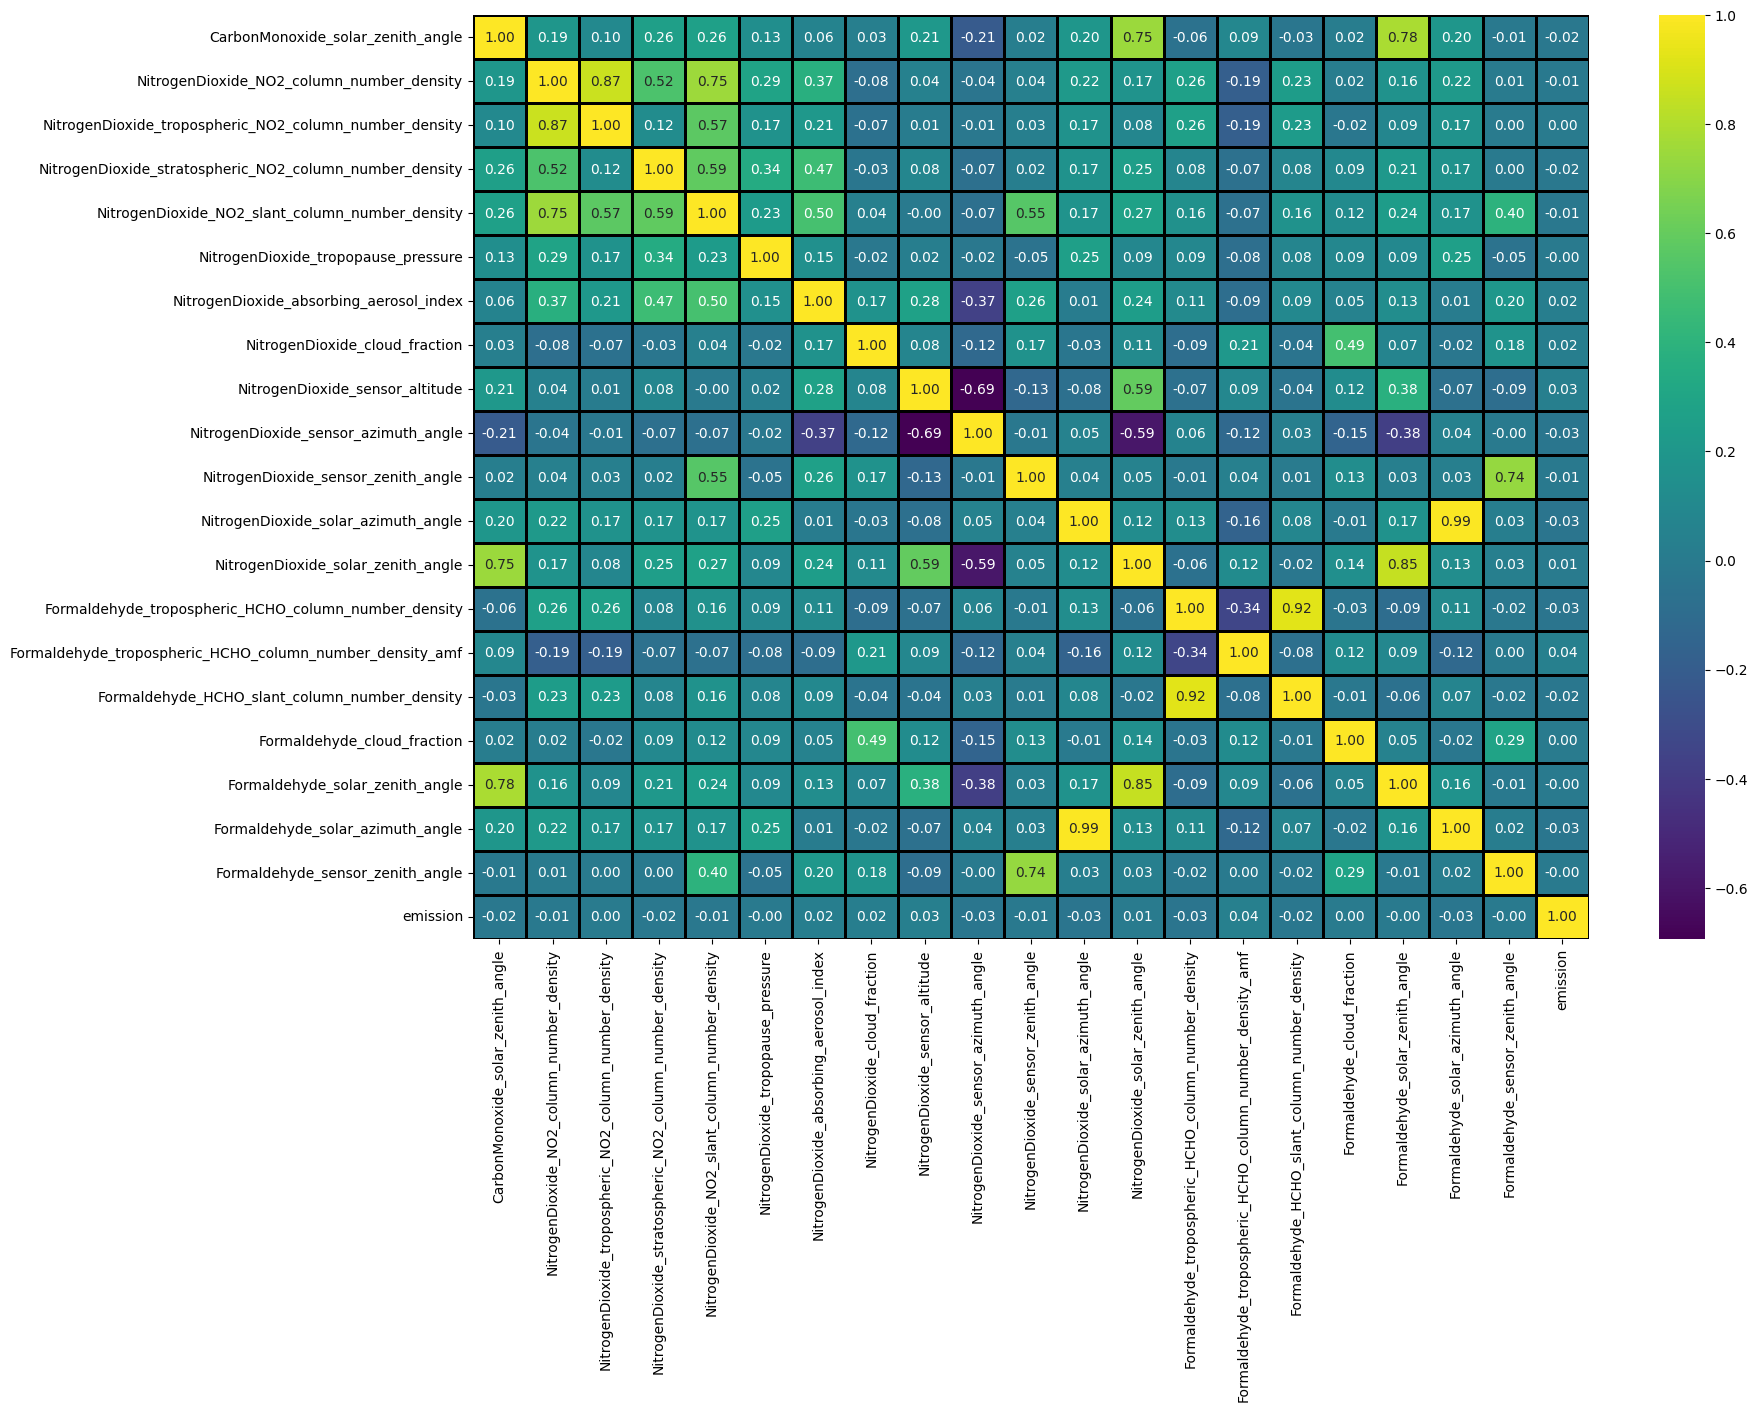

In [19]:
fig, ax =plt.subplots(figsize=(18,12))
sb.heatmap(train_data[train_data.columns[20:40].tolist() + [train_data.columns[-1]]].corr(), 
           linewidths=1, linecolor='black', cmap='viridis', annot=True, fmt = '.2f');

## NOTE: Very high correlation observed amongst some features 
- so we tried to quantify the level of correlation between different pair of features

In [20]:
threshold = 0.8  # We set a threshold of 0.8 correlation coefficient
correlation_matrix = train_data.corr()

# Find pairs of highly correlated features
highly_correlated = (correlation_matrix.abs() > threshold)
correlated_pairs = [(i, j) for i in range(len(highly_correlated.columns)) for j in range(i+1, len(highly_correlated.columns)) if highly_correlated.iloc[i, j]]

print("Highly correlated feature pairs:")
for pair in correlated_pairs:
    print(f"Features {correlation_matrix.columns[pair[0]]} and {correlation_matrix.columns[pair[1]]} are highly correlated.")

Highly correlated feature pairs:
Features SulphurDioxide_SO2_column_number_density and SulphurDioxide_SO2_slant_column_number_density are highly correlated.
Features SulphurDioxide_SO2_column_number_density and SulphurDioxide_SO2_column_number_density_15km are highly correlated.
Features SulphurDioxide_SO2_slant_column_number_density and SulphurDioxide_SO2_column_number_density_15km are highly correlated.
Features SulphurDioxide_sensor_azimuth_angle and NitrogenDioxide_sensor_azimuth_angle are highly correlated.
Features SulphurDioxide_sensor_zenith_angle and NitrogenDioxide_sensor_zenith_angle are highly correlated.
Features SulphurDioxide_solar_azimuth_angle and CarbonMonoxide_solar_azimuth_angle are highly correlated.
Features SulphurDioxide_solar_azimuth_angle and NitrogenDioxide_solar_azimuth_angle are highly correlated.
Features SulphurDioxide_solar_azimuth_angle and Formaldehyde_solar_azimuth_angle are highly correlated.
Features SulphurDioxide_solar_azimuth_angle and UvAerosolI

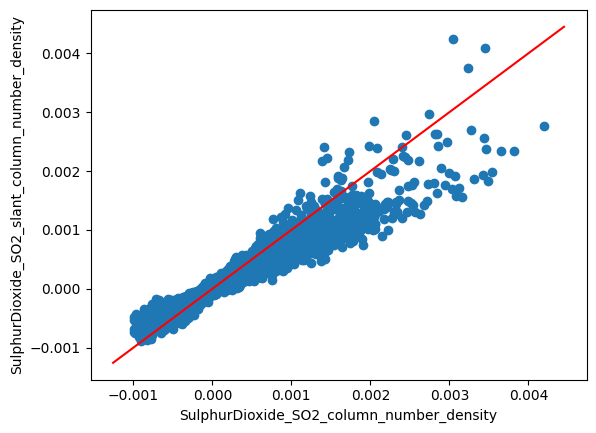

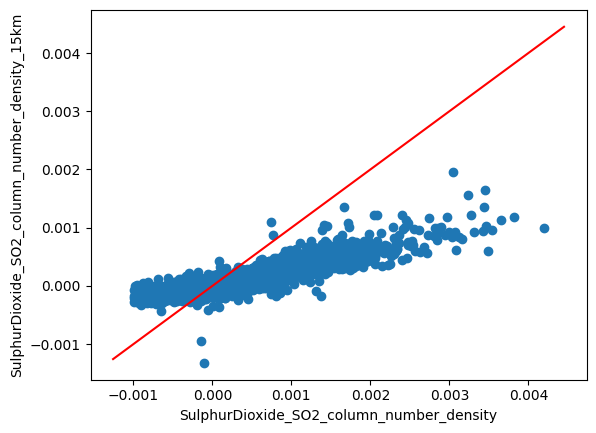

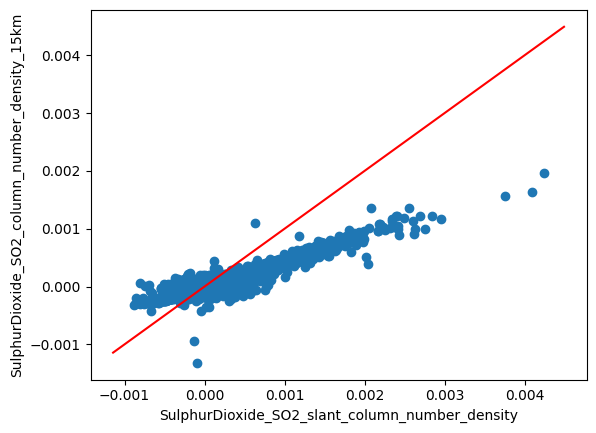

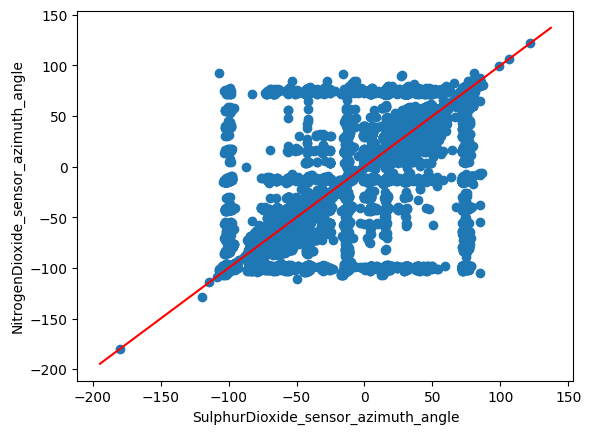

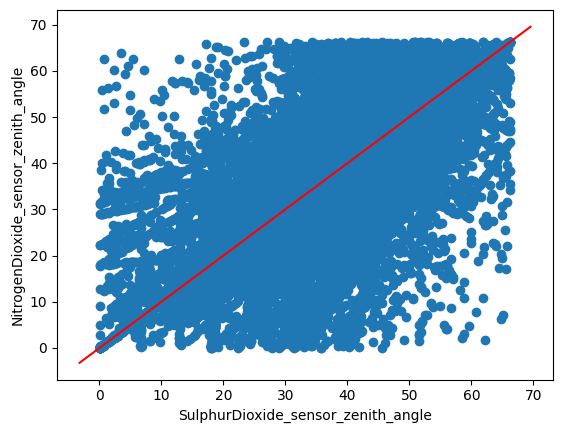

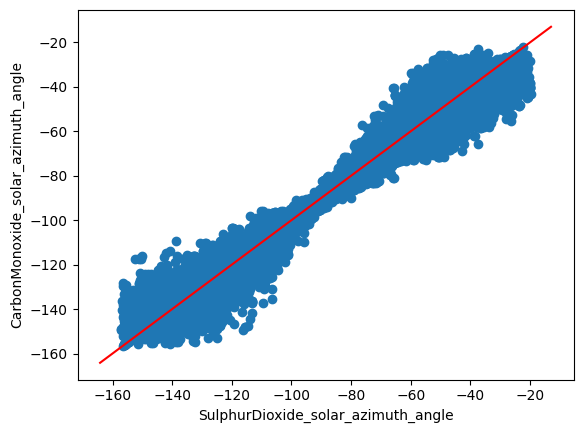

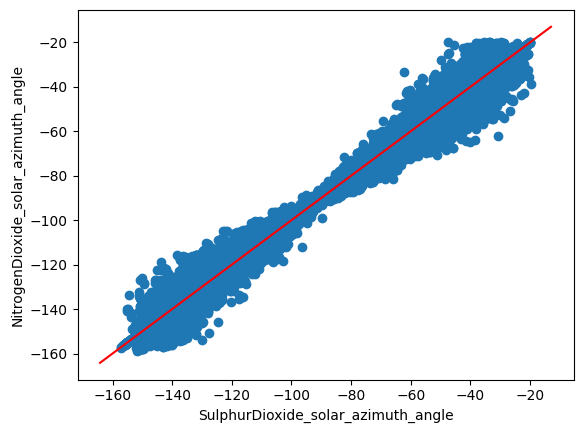

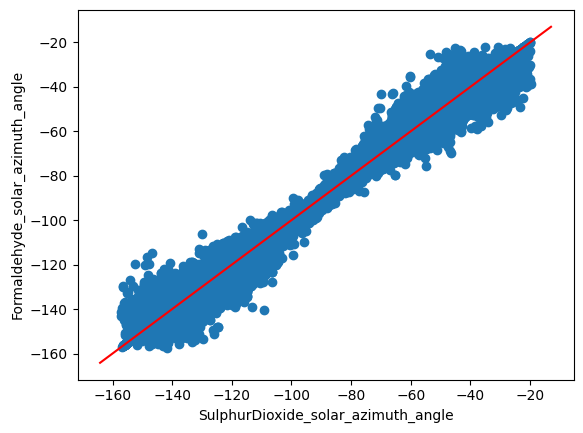

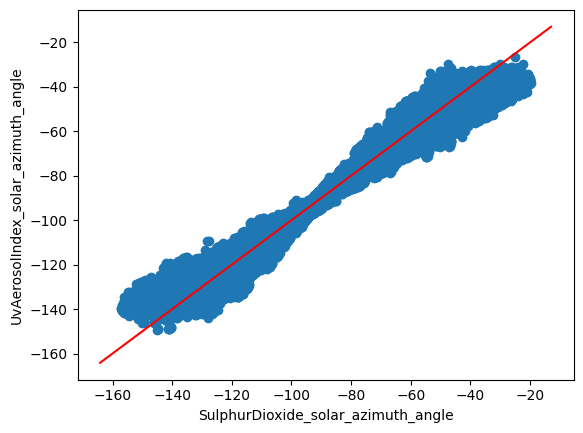

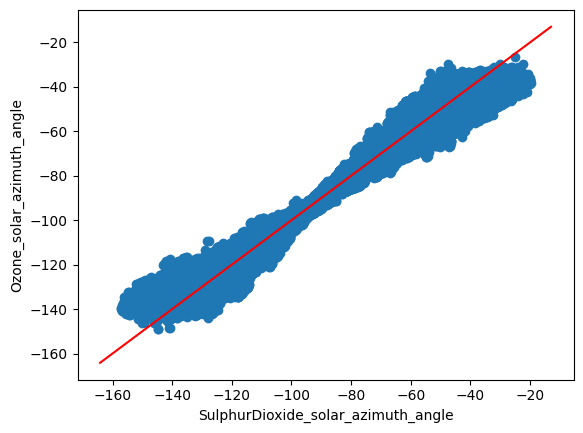

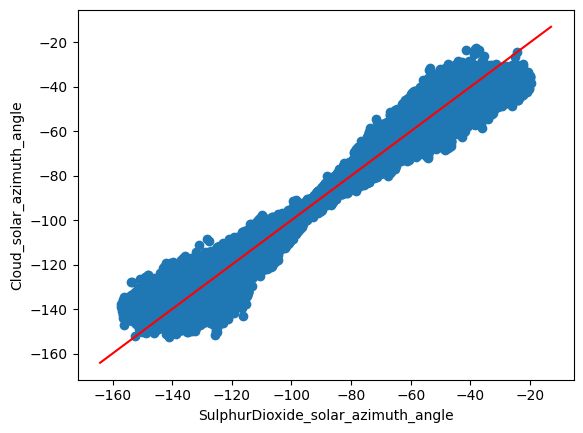

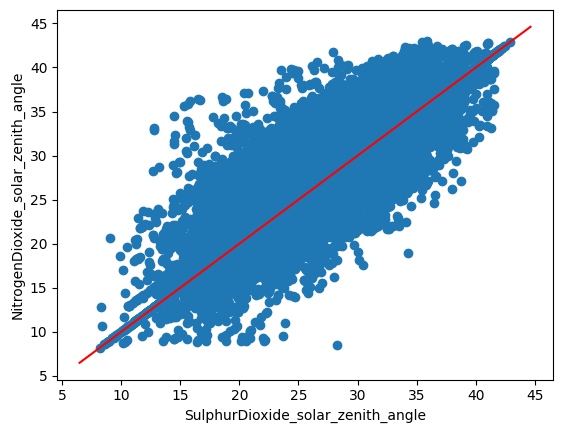

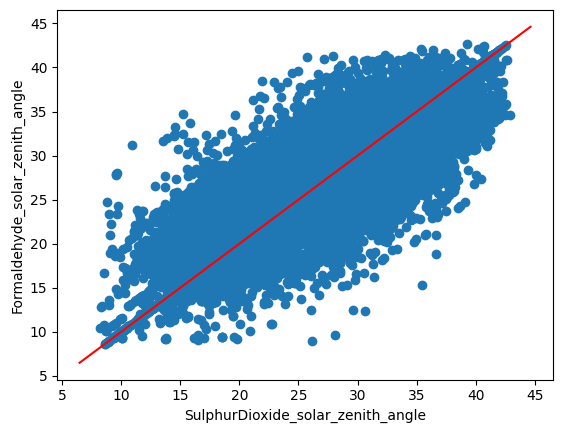

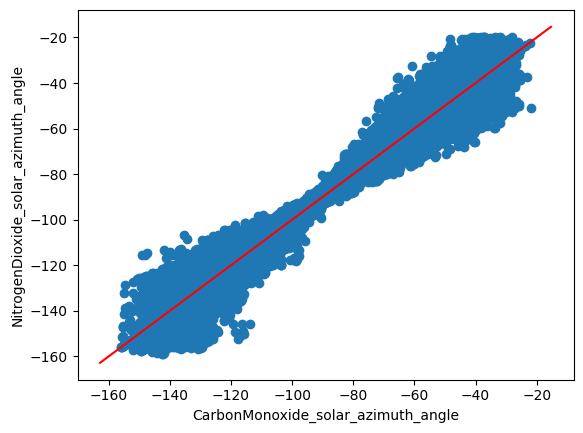

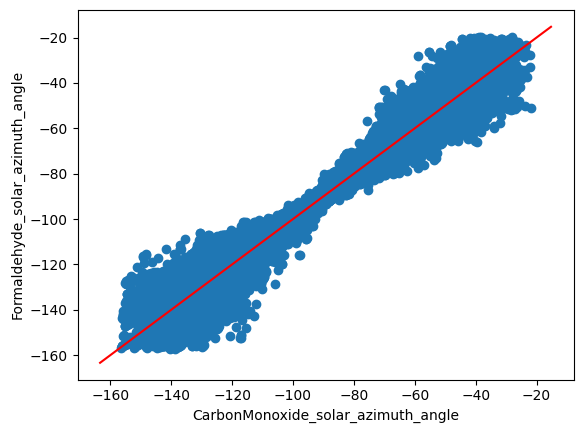

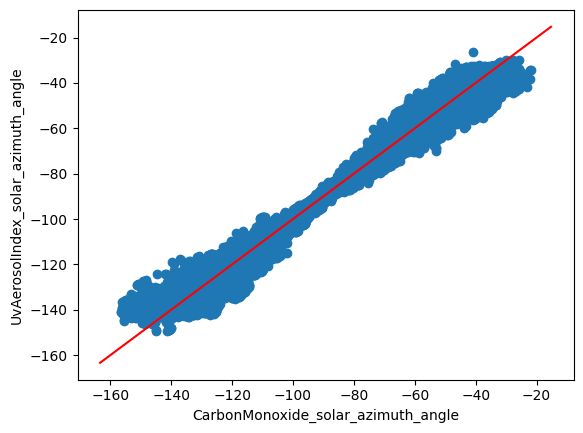

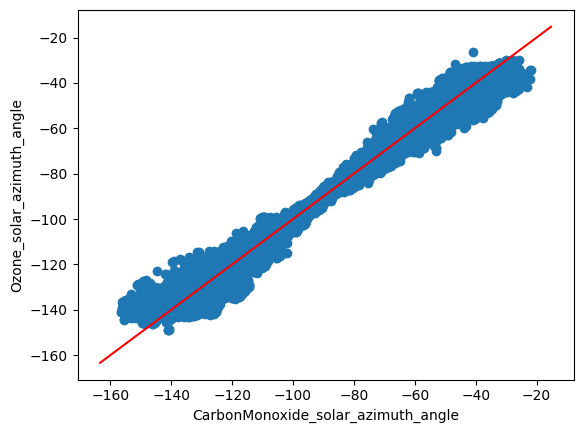

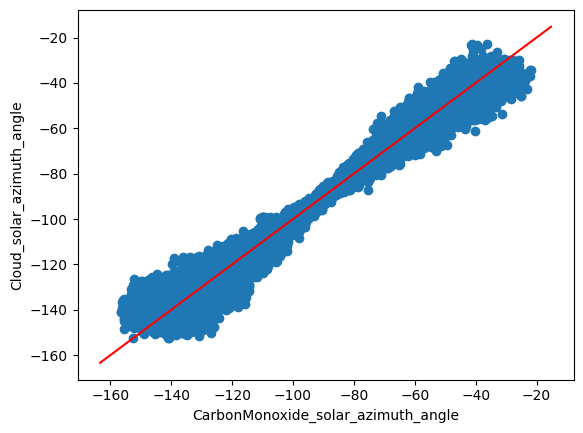

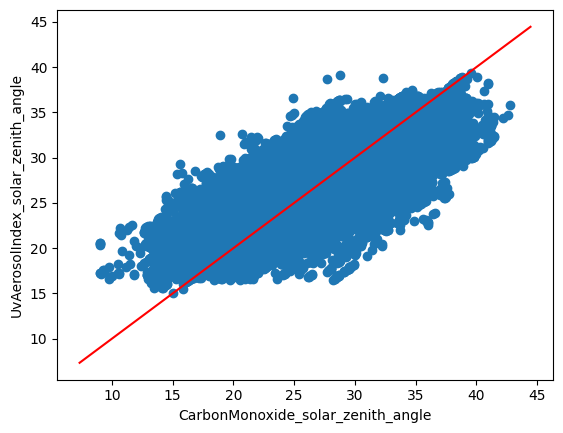

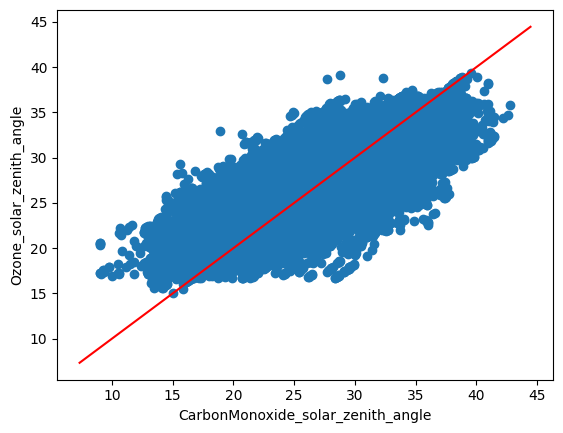

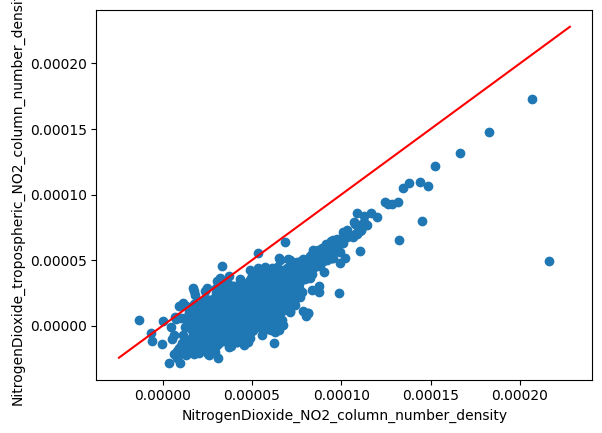

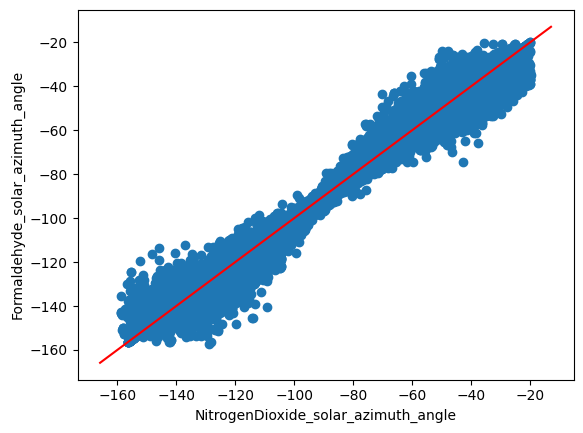

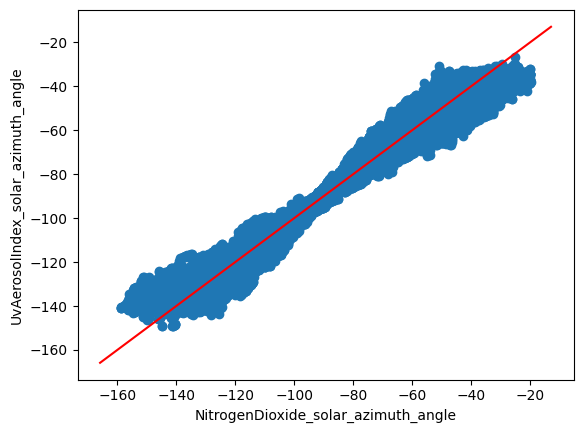

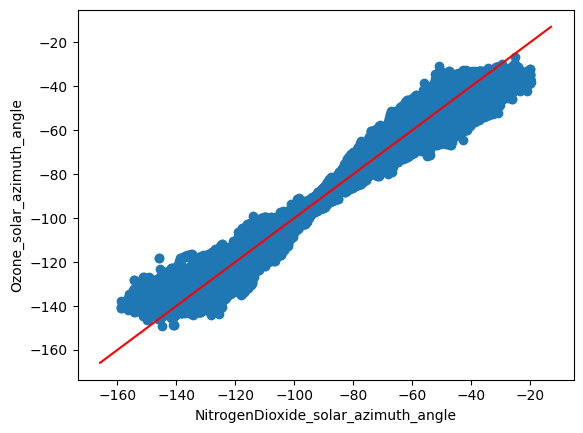

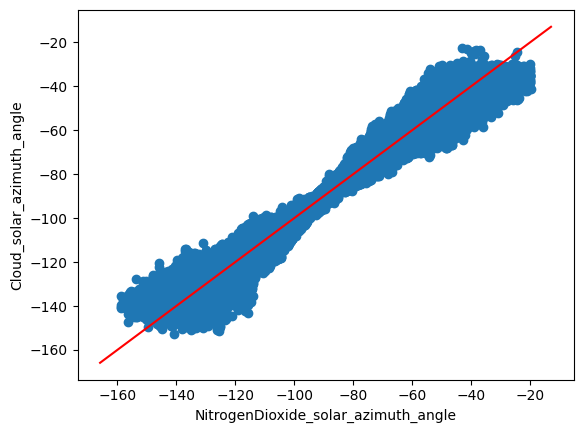

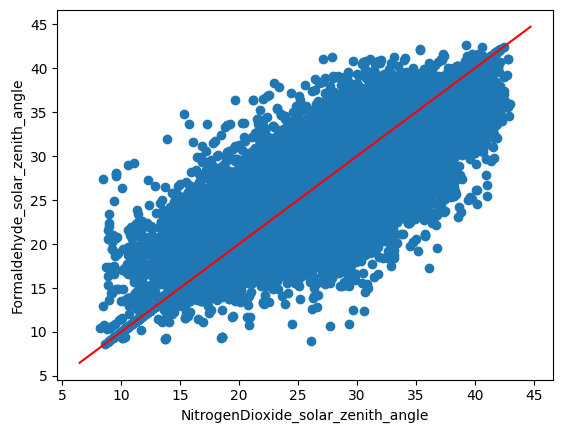

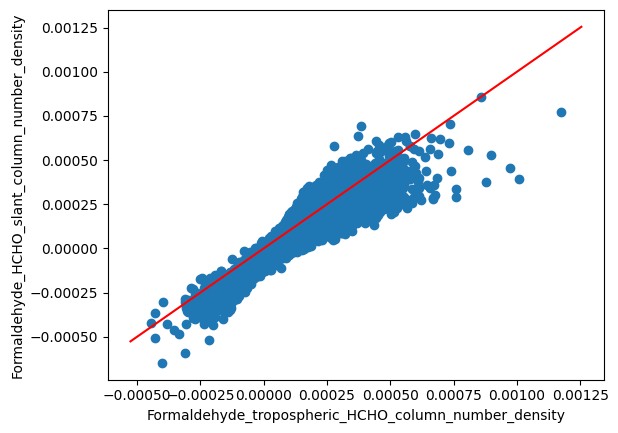

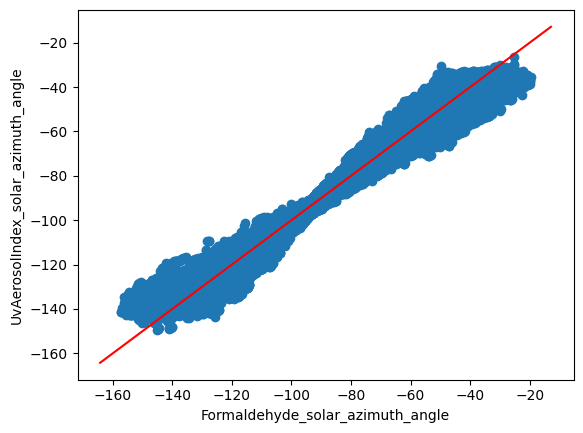

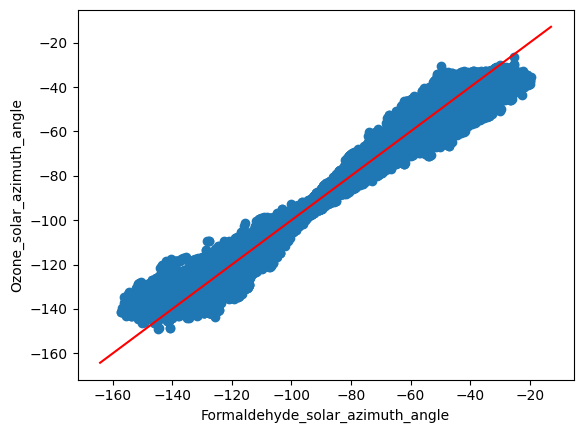

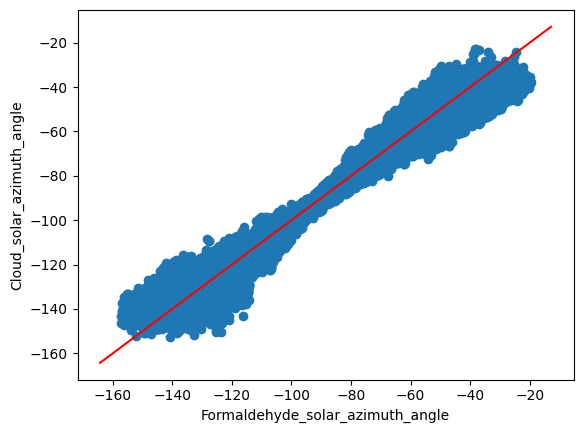

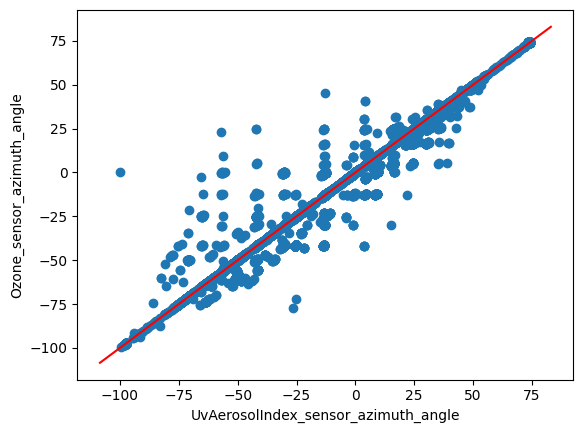

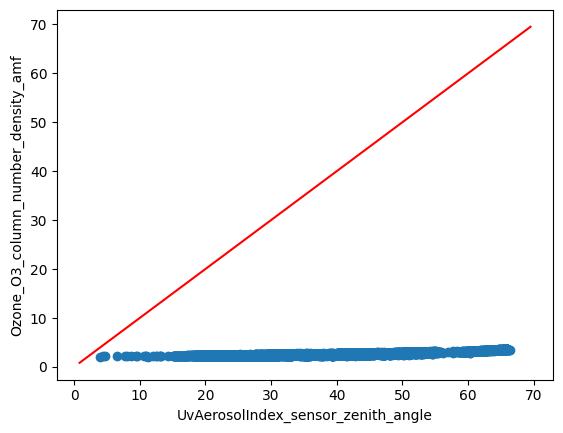

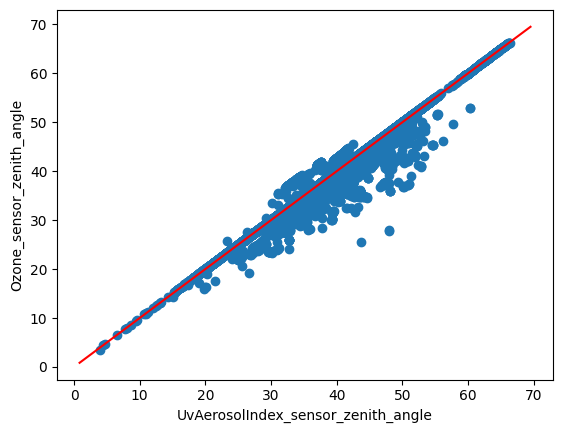

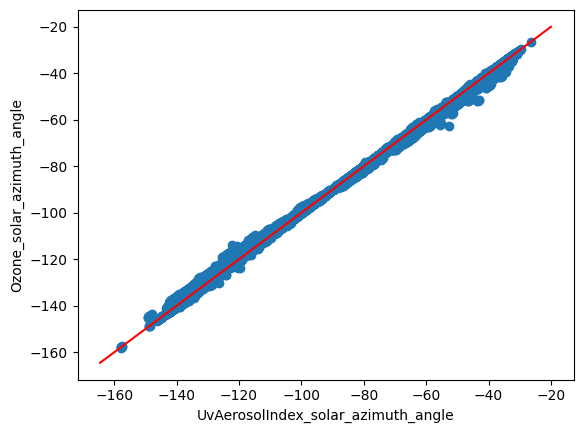

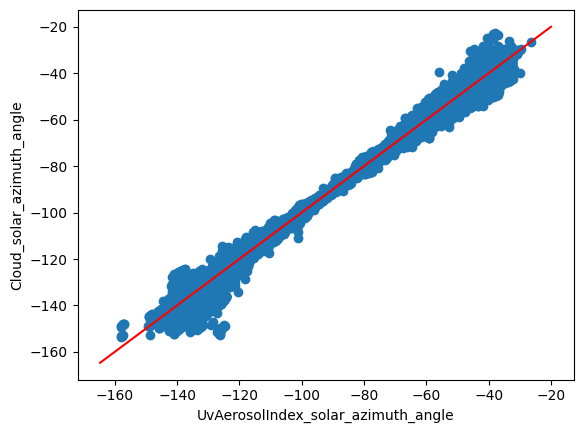

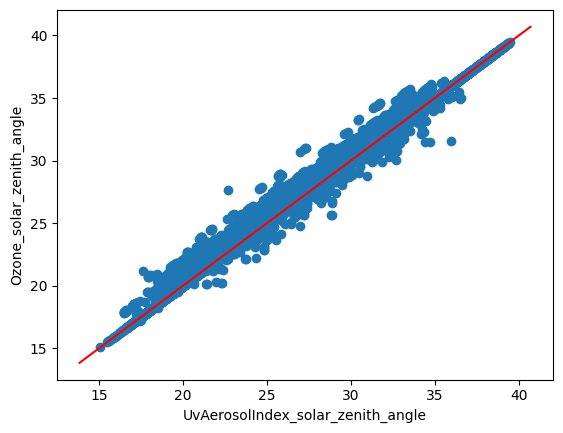

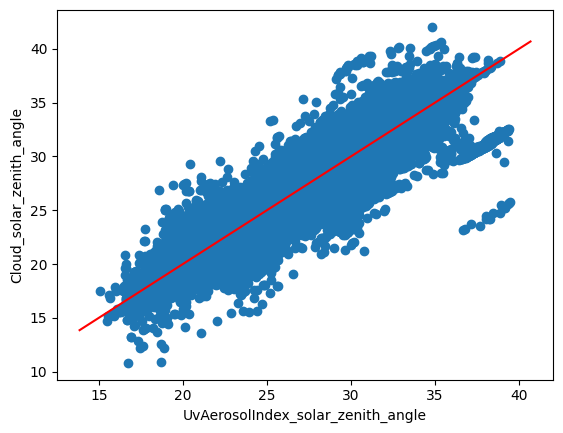

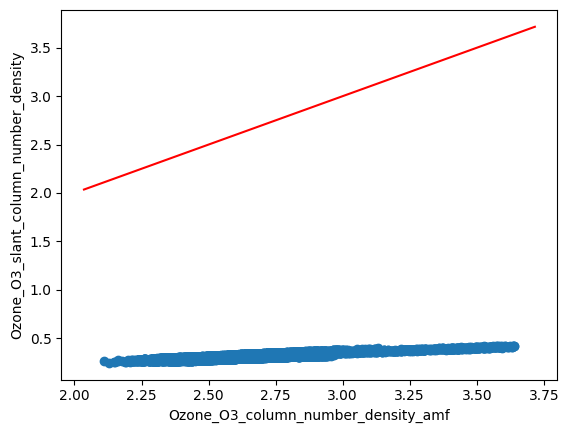

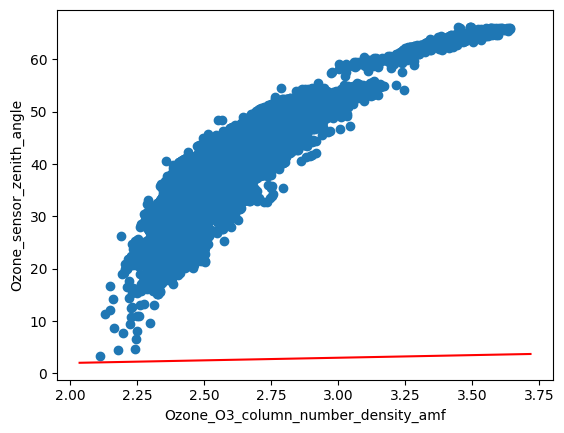

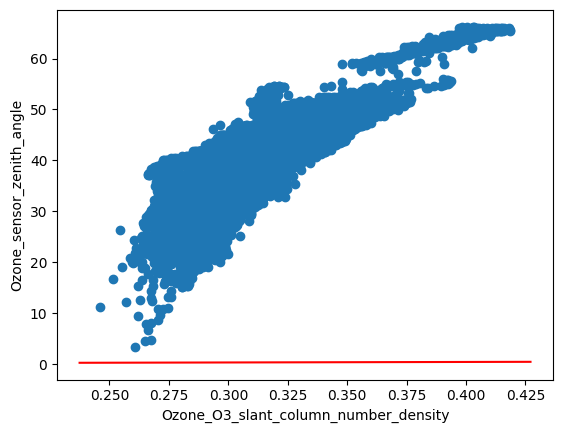

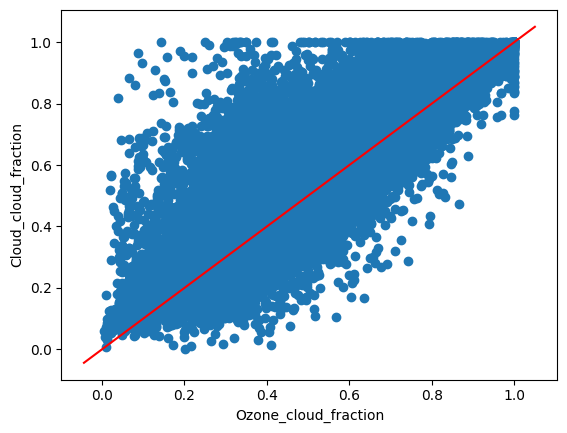

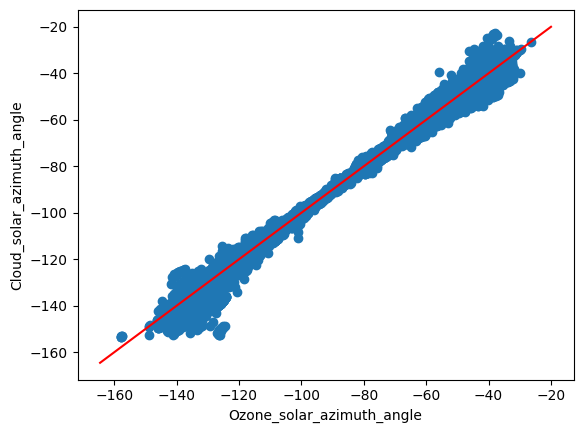

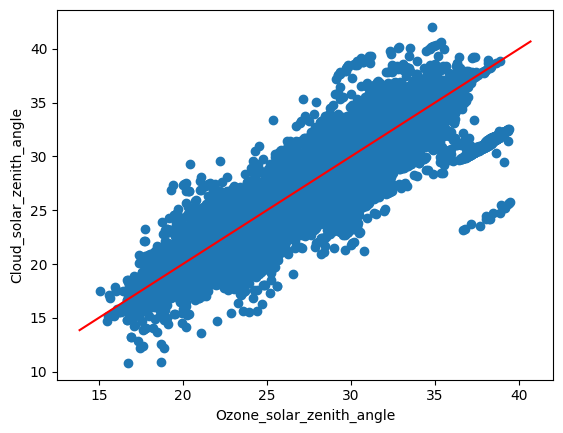

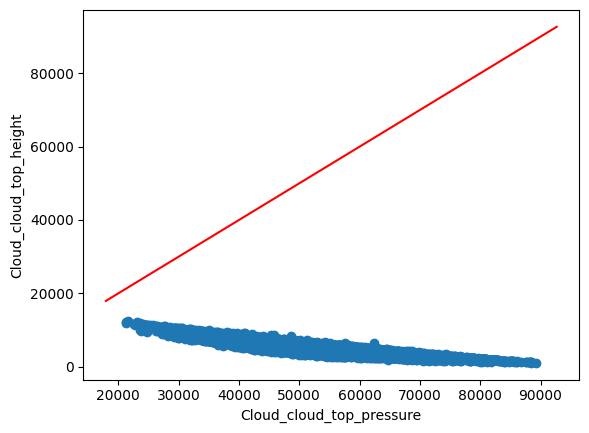

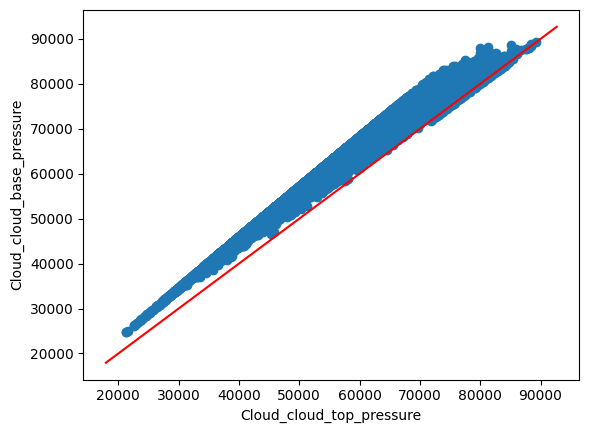

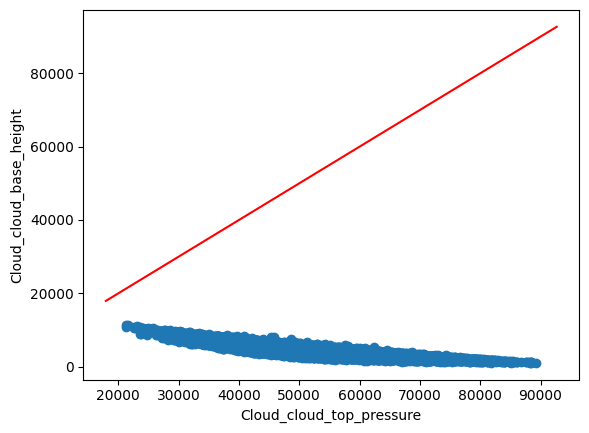

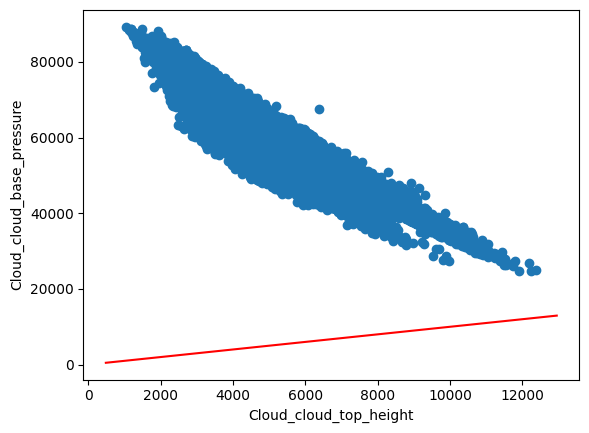

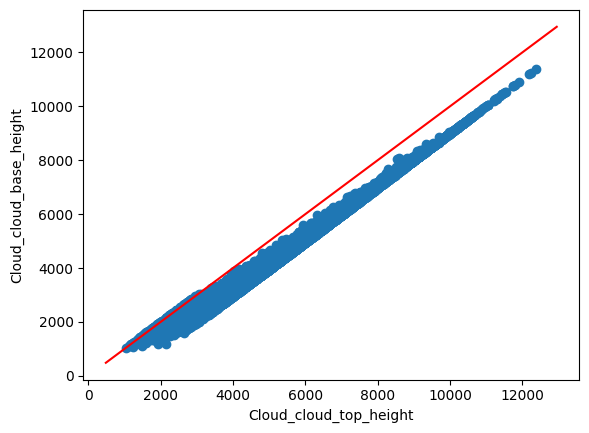

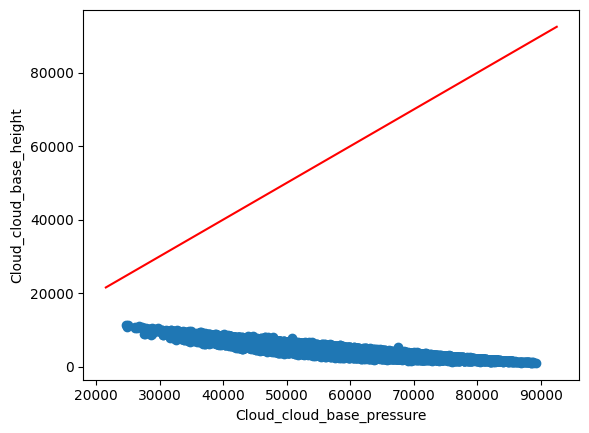

In [21]:
import matplotlib as mt
# Plot scatterplots for highly correlated feature pairs
for pair in correlated_pairs:
    feature1 = correlation_matrix.columns[pair[0]]
    feature2 = correlation_matrix.columns[pair[1]]
    fig, axes = plt.subplots() # 1 row, 2 columns

    axes.scatter(data=train_data, x=feature1, y=feature2)
    axes.set_xlabel(feature1)
    axes.set_ylabel(feature2)
    x = np.linspace(*axes.get_xlim())
    axes.plot(x, x, color='red')
    plt.show()
    fig.tight_layout()


In [22]:
# Covariance
train_data.cov()

latitude     longitude  \
latitude                                  4.823611e-01  1.348023e-01   
longitude                                 1.348023e-01  6.567083e-01   
year                                     -4.341099e-12 -1.605737e-12   
week_no                                   1.022816e-14  1.675875e-15   
SulphurDioxide_SO2_column_number_density  6.681387e-07 -2.824916e-05   
...                                                ...           ...   
Cloud_sensor_azimuth_angle               -2.197895e-01 -4.102601e-01   
Cloud_sensor_zenith_angle                -9.495783e-02 -1.818618e-01   
Cloud_solar_azimuth_angle                -7.562720e-01 -1.605524e-01   
Cloud_solar_zenith_angle                 -6.263422e-02  2.933860e-02   
emission                                  1.788971e+00  1.201486e+01   

                                                  year       week_no  \
latitude                                 -4.341099e-12  1.022816e-14   
longitude                                -1.605737e-12  1.675875e-15   
year                                      6.666751e-01  5.252524e-14   
week_no                                   5.252524e-14  2.340030e+02   
SulphurDioxide_SO2_column_number_density  1.178415e-06  1.417901e-05   
...                                                ...           ...   
Cloud_sensor_azimuth_angle                5.528359e-02 -3.411066e+00   
Cloud_sensor_zenith_angle                 1.100656e-01  6.176152e+00   
Cloud_solar_azimuth_angle                 1.218142e-01 -4.407612e+01   
Cloud_solar_zenith_angle                  3.210757e-03  2.659459e+01   
emission                                 -1.560386e+00  1.564139e+01   

                                          SulphurDioxide_SO2_column_number_density  \
latitude                                                              6.681387e-07   
longitude                                                            -2.824916e-05   
year                                                                  1.178415e-06   
week_no                                                               1.417901e-05   
SulphurDioxide_SO2_column_number_density                              7.399969e-08   
...                                                                            ...   
Cloud_sensor_azimuth_angle                                            1.541690e-04   
Cloud_sensor_zenith_angle                                             4.127824e-05   
Cloud_solar_azimuth_angle                                             4.116810e-04   
Cloud_solar_zenith_angle                                              6.142720e-05   
emission                                                             -7.331864e-04   

                                          SulphurDioxide_SO2_column_number_density_amf  \
latitude                                                                      0.005845   
longitude                                                                     0.012887   
year                                                                         -0.019361   
week_no                                                                       0.176568   
SulphurDioxide_SO2_column_number_density                                     -0.000003   
...                                                                                ...   
Cloud_sensor_azimuth_angle                                                   -0.294291   
Cloud_sensor_zenith_angle                                                    -0.029701   
Cloud_solar_azimuth_angle                                                    -1.026029   
Cloud_solar_zenith_angle                                                      0.033644   
emission                                                                      0.009056   

                                          SulphurDioxide_SO2_slant_column_number_density  \
latitude                                                                    1.063684e-06   
longitude         

## Visualize the target label (emission) and filter by year

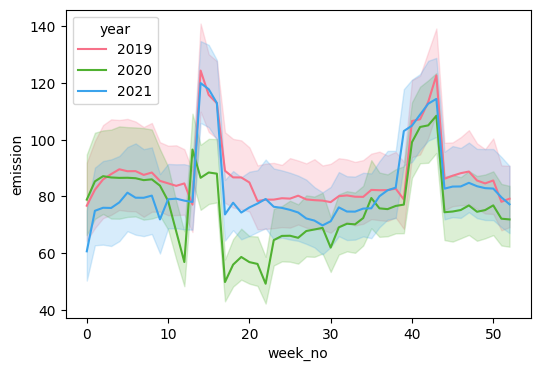

In [23]:
palette = sb.color_palette("husl", len(train_data_copy['year'].unique()))
fig, ax = plt.subplots(figsize=(6,4))
sb.lineplot(data=train_data_copy, x = 'week_no', 
            y = 'emission',
            hue='year',
           palette = palette);
plt.show()

> 2019 and 2021 emission have similar behavior while 2020 emission is significantly lower especially from week 10 to week 30

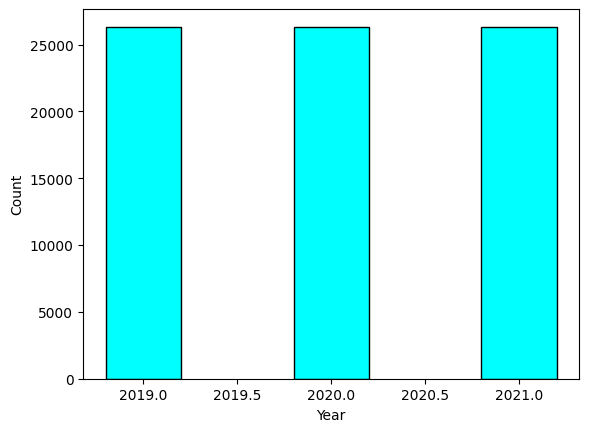

In [24]:
plt.bar(dict(train_data['year'].value_counts()).keys(), dict(train_data['year'].value_counts()).values(),
        width=0.4, color='cyan', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Count');
    

> Data seems balanced by year

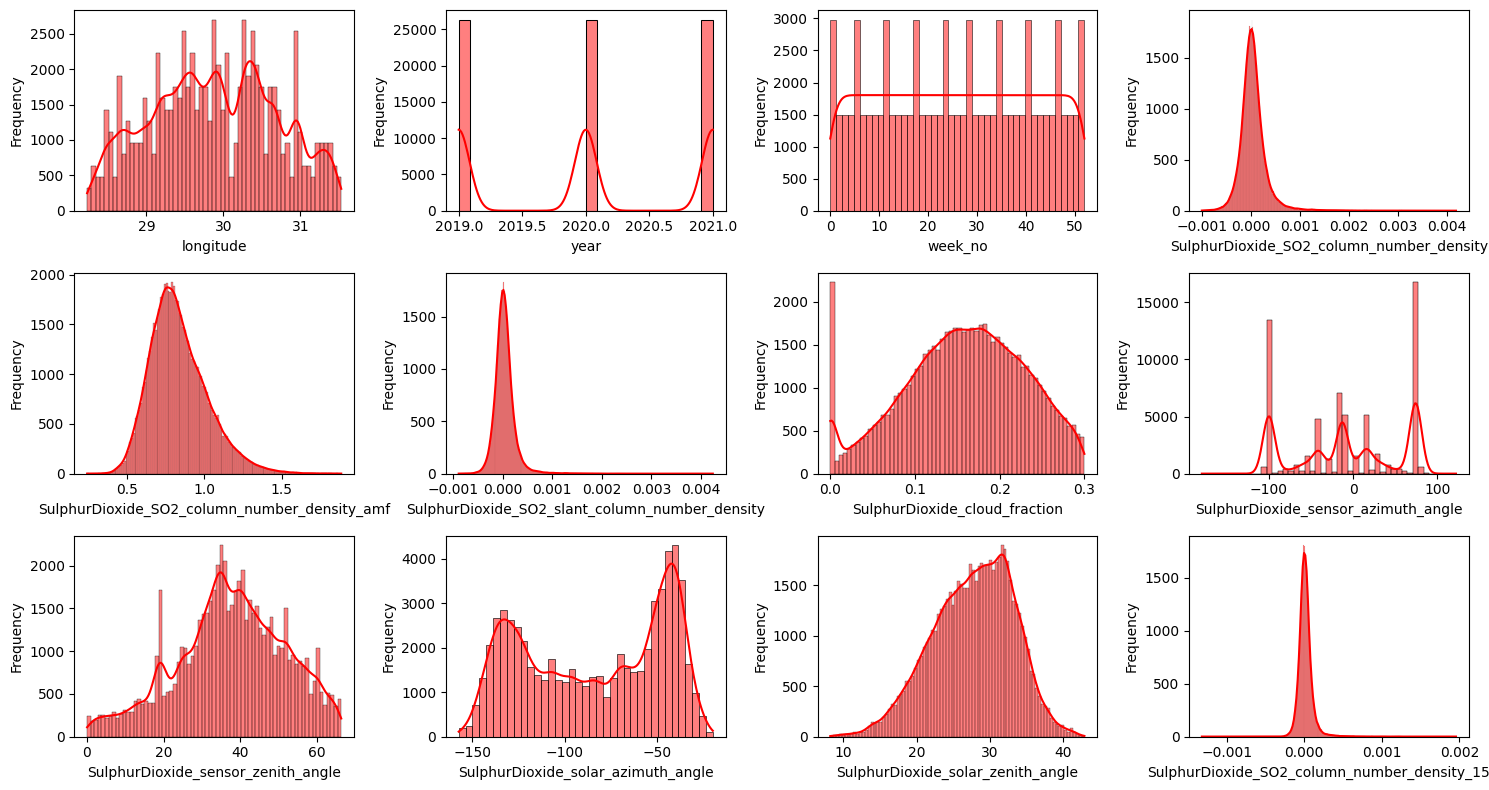

In [25]:
plt.figure(figsize=(15, 8))  # Adjust figsize as needed
for i, column in enumerate(train_data.columns[1:13]):
    plt.subplot(3, 4, i + 1)  # Adjust the layout according to the number of features
    sb.histplot(train_data[column], kde=True, color='red')  # Use histplot to show the distribution
#     plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

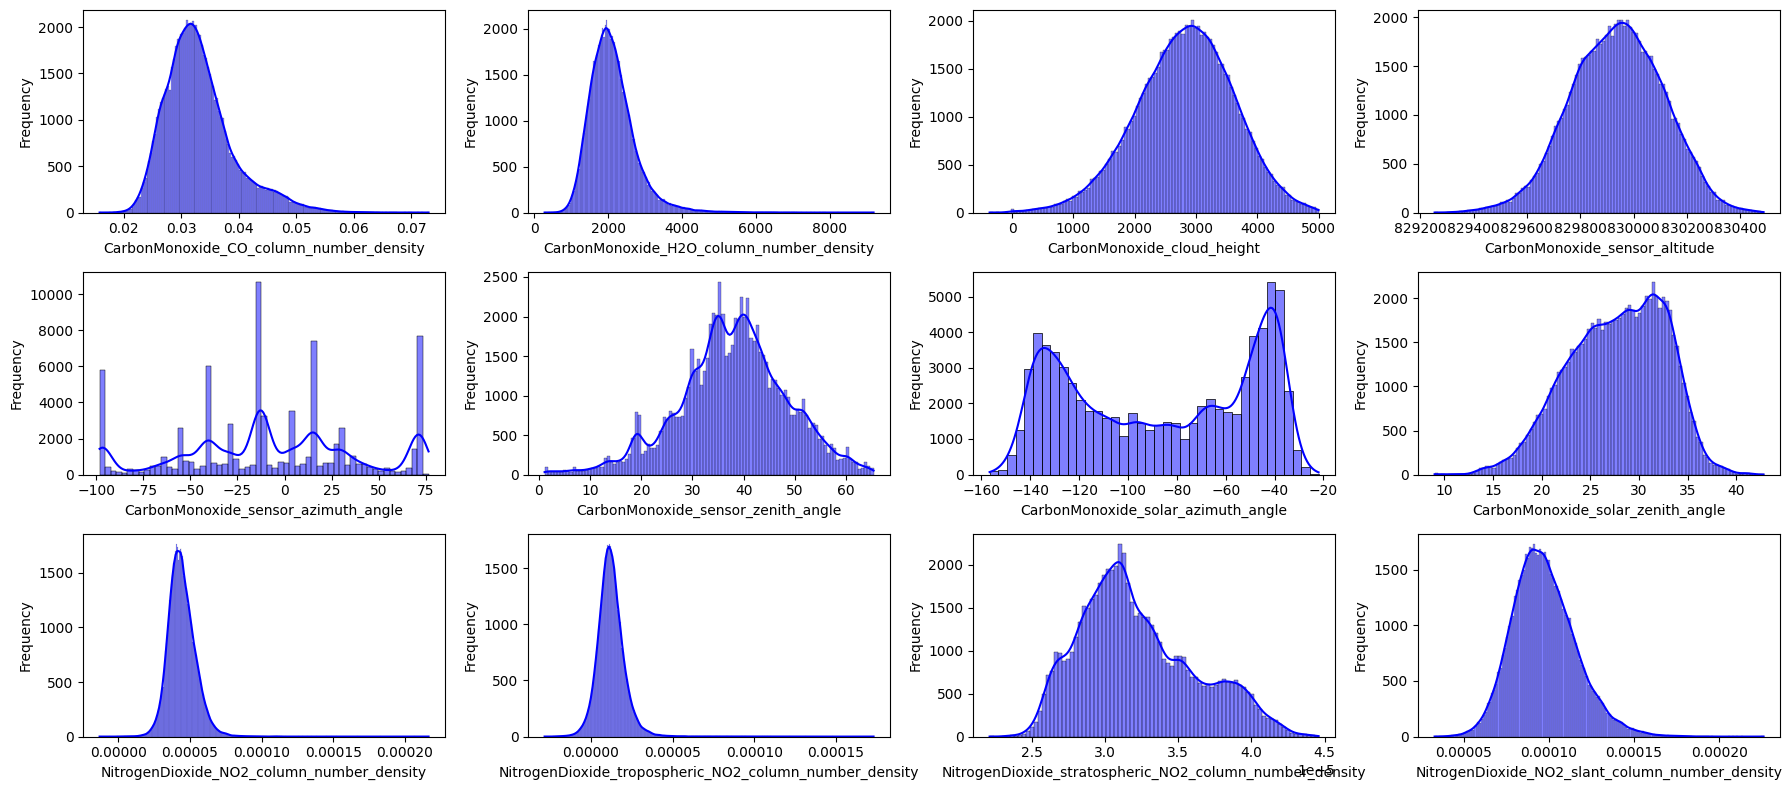

In [26]:
plt.figure(figsize=(18, 8))  # Adjust figsize as needed
for i, column in enumerate(train_data.columns[13:25]):
    plt.subplot(3, 4, i + 1)  # Adjust the layout according to the number of features
    sb.histplot(train_data[column], kde=True, color='blue')  # Use histplot to show the distribution
#     plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

(0.0, 500.0)

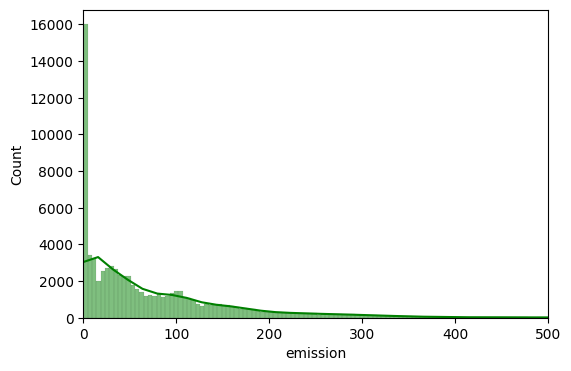

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
sb.histplot(train_data['emission'], kde=True, color='green')
#plt.ylim(0,1600)
plt.xlim(0,500)

<Axes: xlabel='emission', ylabel='Count'>

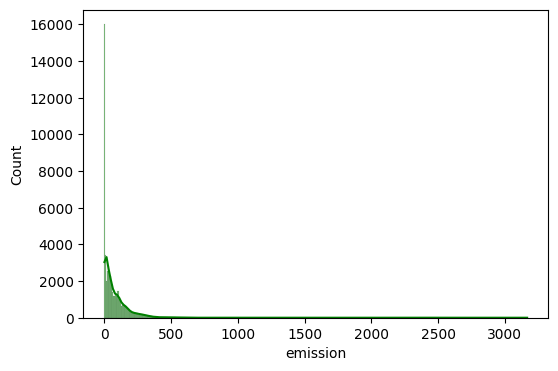

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
sb.histplot(train_data['emission'], kde=True, color='green')
#plt.ylim(0,500)

Text(0.5, 0, 'emission')

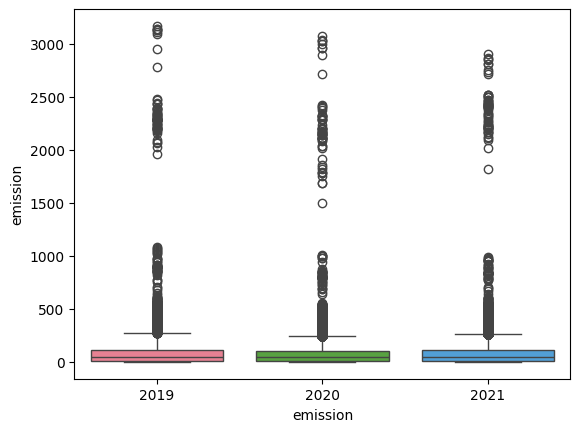

In [30]:
palette = sb.color_palette("husl", len(train_data_copy['year'].unique()))
sb.boxplot(data=train_data, x='year', y='emission',palette=palette)
#plt.ylim(0,500)
plt.xlabel('emission')

Text(0.5, 0, 'Year')

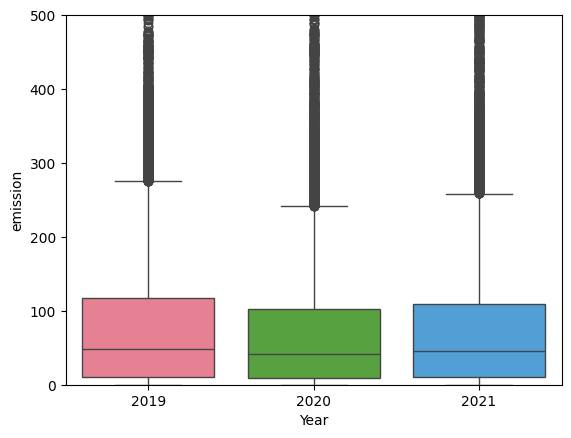

In [35]:
palette = sb.color_palette("husl", len(train_data_copy['year'].unique()))
sb.boxplot(data=train_data, x='year', y='emission',palette=palette)
plt.ylim(0,500)
plt.xlabel('Year')

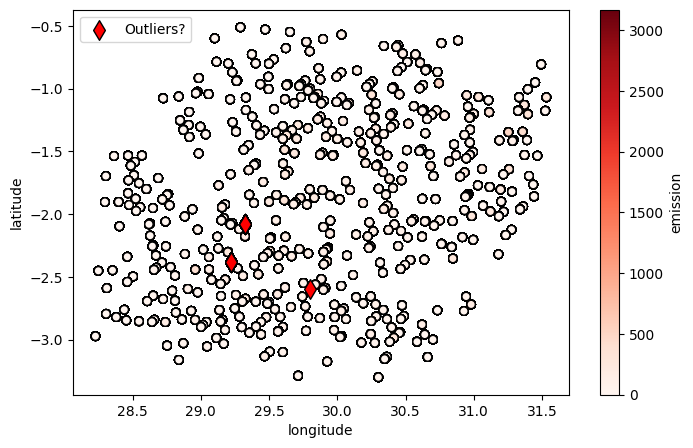

In [45]:
Q1 = train_data['emission'].quantile(0.05)
Q3 = train_data['emission'].quantile(0.95)
IQR = Q3 - Q1

# Define the threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = train_data[(train_data['emission'] < lower_threshold) | (train_data['emission'] > upper_threshold)]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,5))
scatter = ax.scatter(train_data['longitude'], train_data['latitude'], c=train_data['emission'], cmap='Reds', edgecolor='k')

# Highlight outliers in a different color and with larger size
ax.scatter(outliers['longitude'], outliers['latitude'], c='red', s=100, marker='d', label='Outliers?', edgecolor='k')

cbar = plt.colorbar(scatter)
cbar.set_label('emission')

plt.xlabel('longitude')
plt.ylabel('latitude')


ax.legend(loc='upper left')

plt.show()

## DATA PREPROCESING

1. Treat null values

2. Scale features

3. Split treated training dataset into training and validation dataset

In [28]:
# Copy the treated train_data (where we've dropped 7 columns with very high number of missing data)
train_data_copy2 = train_data.copy()

In [29]:
# Drop missing values
train_data.dropna(inplace=True)

In [30]:
train_data.shape, train_data_copy2.shape

((57209, 68), (79023, 68))

> We still have 57209 by 69 data to work with after dropping the missing values

In [31]:
train_data.isna().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 68, dtype: int64

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57209 entries, 1 to 79022
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  57209 non-null  float64
 1   longitude                                                 57209 non-null  float64
 2   year                                                      57209 non-null  int64  
 3   week_no                                                   57209 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  57209 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              57209 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            57209 non-null  float64
 7   SulphurDioxide_cloud_fraction                             57209 non-null  float64
 8   SulphurDioxide_sensor

In [33]:
train_data.describe()

latitude     longitude          year       week_no  \
count  57209.000000  57209.000000  57209.000000  57209.000000   
mean      -1.896526     29.911039   2019.984618     25.756909   
std        0.703606      0.801112      0.816922     14.744678   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.479000     29.290000   2019.000000     13.000000   
50%       -1.911000     29.917000   2020.000000     26.000000   
75%       -1.283000     30.480000   2021.000000     38.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              57209.000000   
mean                                   0.000048   
std                                    0.000263   
min                                   -0.000996   
25%                                   -0.000093   
50%                                    0.000025   
75%                                    0.000152   
max                                    0.003823   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  57209.000000   
mean                                       0.828272   
std                                        0.176912   
min                                        0.320208   
25%                                        0.704617   
50%                                        0.804802   
75%                                        0.932060   
max                                        1.815032   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    57209.000000   
mean                                         0.000035   
std                                          0.000195   
min                                         -0.000887   
25%                                         -0.000075   
50%                                          0.000019   
75%                                          0.000119   
max                                          0.003753   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   57209.000000                         57209.000000   
mean                        0.149240                            -9.326873   
std                         0.067927                            62.498784   
min                         0.000000                          -179.537059   
25%                         0.104521                           -56.226482   
50%                         0.152850                           -12.551151   
75%                         0.198379                            54.713985   
max                         0.299977                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        57209.000000  ...            57209.000000   
mean                            36.871226  ...             5456.445654   
std                             13.688283  ...             1461.920321   
min                              0.099237  ...             1050.661782   
25%                             28.685590  ...             4411.871911   
50%                             37.146735  ...             5423.014905   
75%                             46.447449  ...             6437.602188   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               57209.000000             57209.000000   
mean                60352.642205              4553.952322   
std                  9256.870559              1384.342820   
min                 24779.033704              1050.496816   
25%                 53900.510265              3521.758671   
50%                 60297.061346              4489.444789   
75%                 66974.791314              5478.562898   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

## scale features

- As observed from the histogram plot above, different feature exhibits different distribution, mean, range, etc.
To avoid the model placing more weights on data with higher values, we scaled the features so we can have a common mean and distribution

In [34]:
train_data.describe()

latitude     longitude          year       week_no  \
count  57209.000000  57209.000000  57209.000000  57209.000000   
mean      -1.896526     29.911039   2019.984618     25.756909   
std        0.703606      0.801112      0.816922     14.744678   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.479000     29.290000   2019.000000     13.000000   
50%       -1.911000     29.917000   2020.000000     26.000000   
75%       -1.283000     30.480000   2021.000000     38.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              57209.000000   
mean                                   0.000048   
std                                    0.000263   
min                                   -0.000996   
25%                                   -0.000093   
50%                                    0.000025   
75%                                    0.000152   
max                                    0.003823   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  57209.000000   
mean                                       0.828272   
std                                        0.176912   
min                                        0.320208   
25%                                        0.704617   
50%                                        0.804802   
75%                                        0.932060   
max                                        1.815032   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    57209.000000   
mean                                         0.000035   
std                                          0.000195   
min                                         -0.000887   
25%                                         -0.000075   
50%                                          0.000019   
75%                                          0.000119   
max                                          0.003753   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   57209.000000                         57209.000000   
mean                        0.149240                            -9.326873   
std                         0.067927                            62.498784   
min                         0.000000                          -179.537059   
25%                         0.104521                           -56.226482   
50%                         0.152850                           -12.551151   
75%                         0.198379                            54.713985   
max                         0.299977                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        57209.000000  ...            57209.000000   
mean                            36.871226  ...             5456.445654   
std                             13.688283  ...             1461.920321   
min                              0.099237  ...             1050.661782   
25%                             28.685590  ...             4411.871911   
50%                             37.146735  ...             5423.014905   
75%                             46.447449  ...             6437.602188   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               57209.000000             57209.000000   
mean                60352.642205              4553.952322   
std                  9256.870559              1384.342820   
min                 24779.033704              1050.496816   
25%                 53900.510265              3521.758671   
50%                 60297.061346              4489.444789   
75%                 66974.791314              5478.562898   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

In [35]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(train_data.drop('emission', axis=1))
features_scaled

array([[ 1.97061621, -0.77522789, -1.20528746, ..., -0.11095167,
        -1.63541871, -0.14549329],
       [ 1.97061621, -0.77522789, -1.20528746, ..., -1.51680216,
        -1.56427068, -0.38288593],
       [ 1.97061621, -0.77522789, -1.20528746, ..., -0.44332856,
        -1.53730725, -1.27745248],
       ...,
       [-1.99328254,  0.48677831,  1.24294668, ...,  1.11294405,
        -1.34352274,  0.64388906],
       [-1.99328254,  0.48677831,  1.24294668, ...,  1.23074815,
        -1.4822461 ,  0.2719046 ],
       [-1.99328254,  0.48677831,  1.24294668, ...,  1.17359611,
        -1.39818752,  0.52612577]])

In [36]:
features_scaled.shape, train_data.shape

((57209, 67), (57209, 68))

In [37]:
features_scaled_df = pd.DataFrame(data=features_scaled, columns=train_data.columns[:-1])

In [38]:
target = train_data['emission']

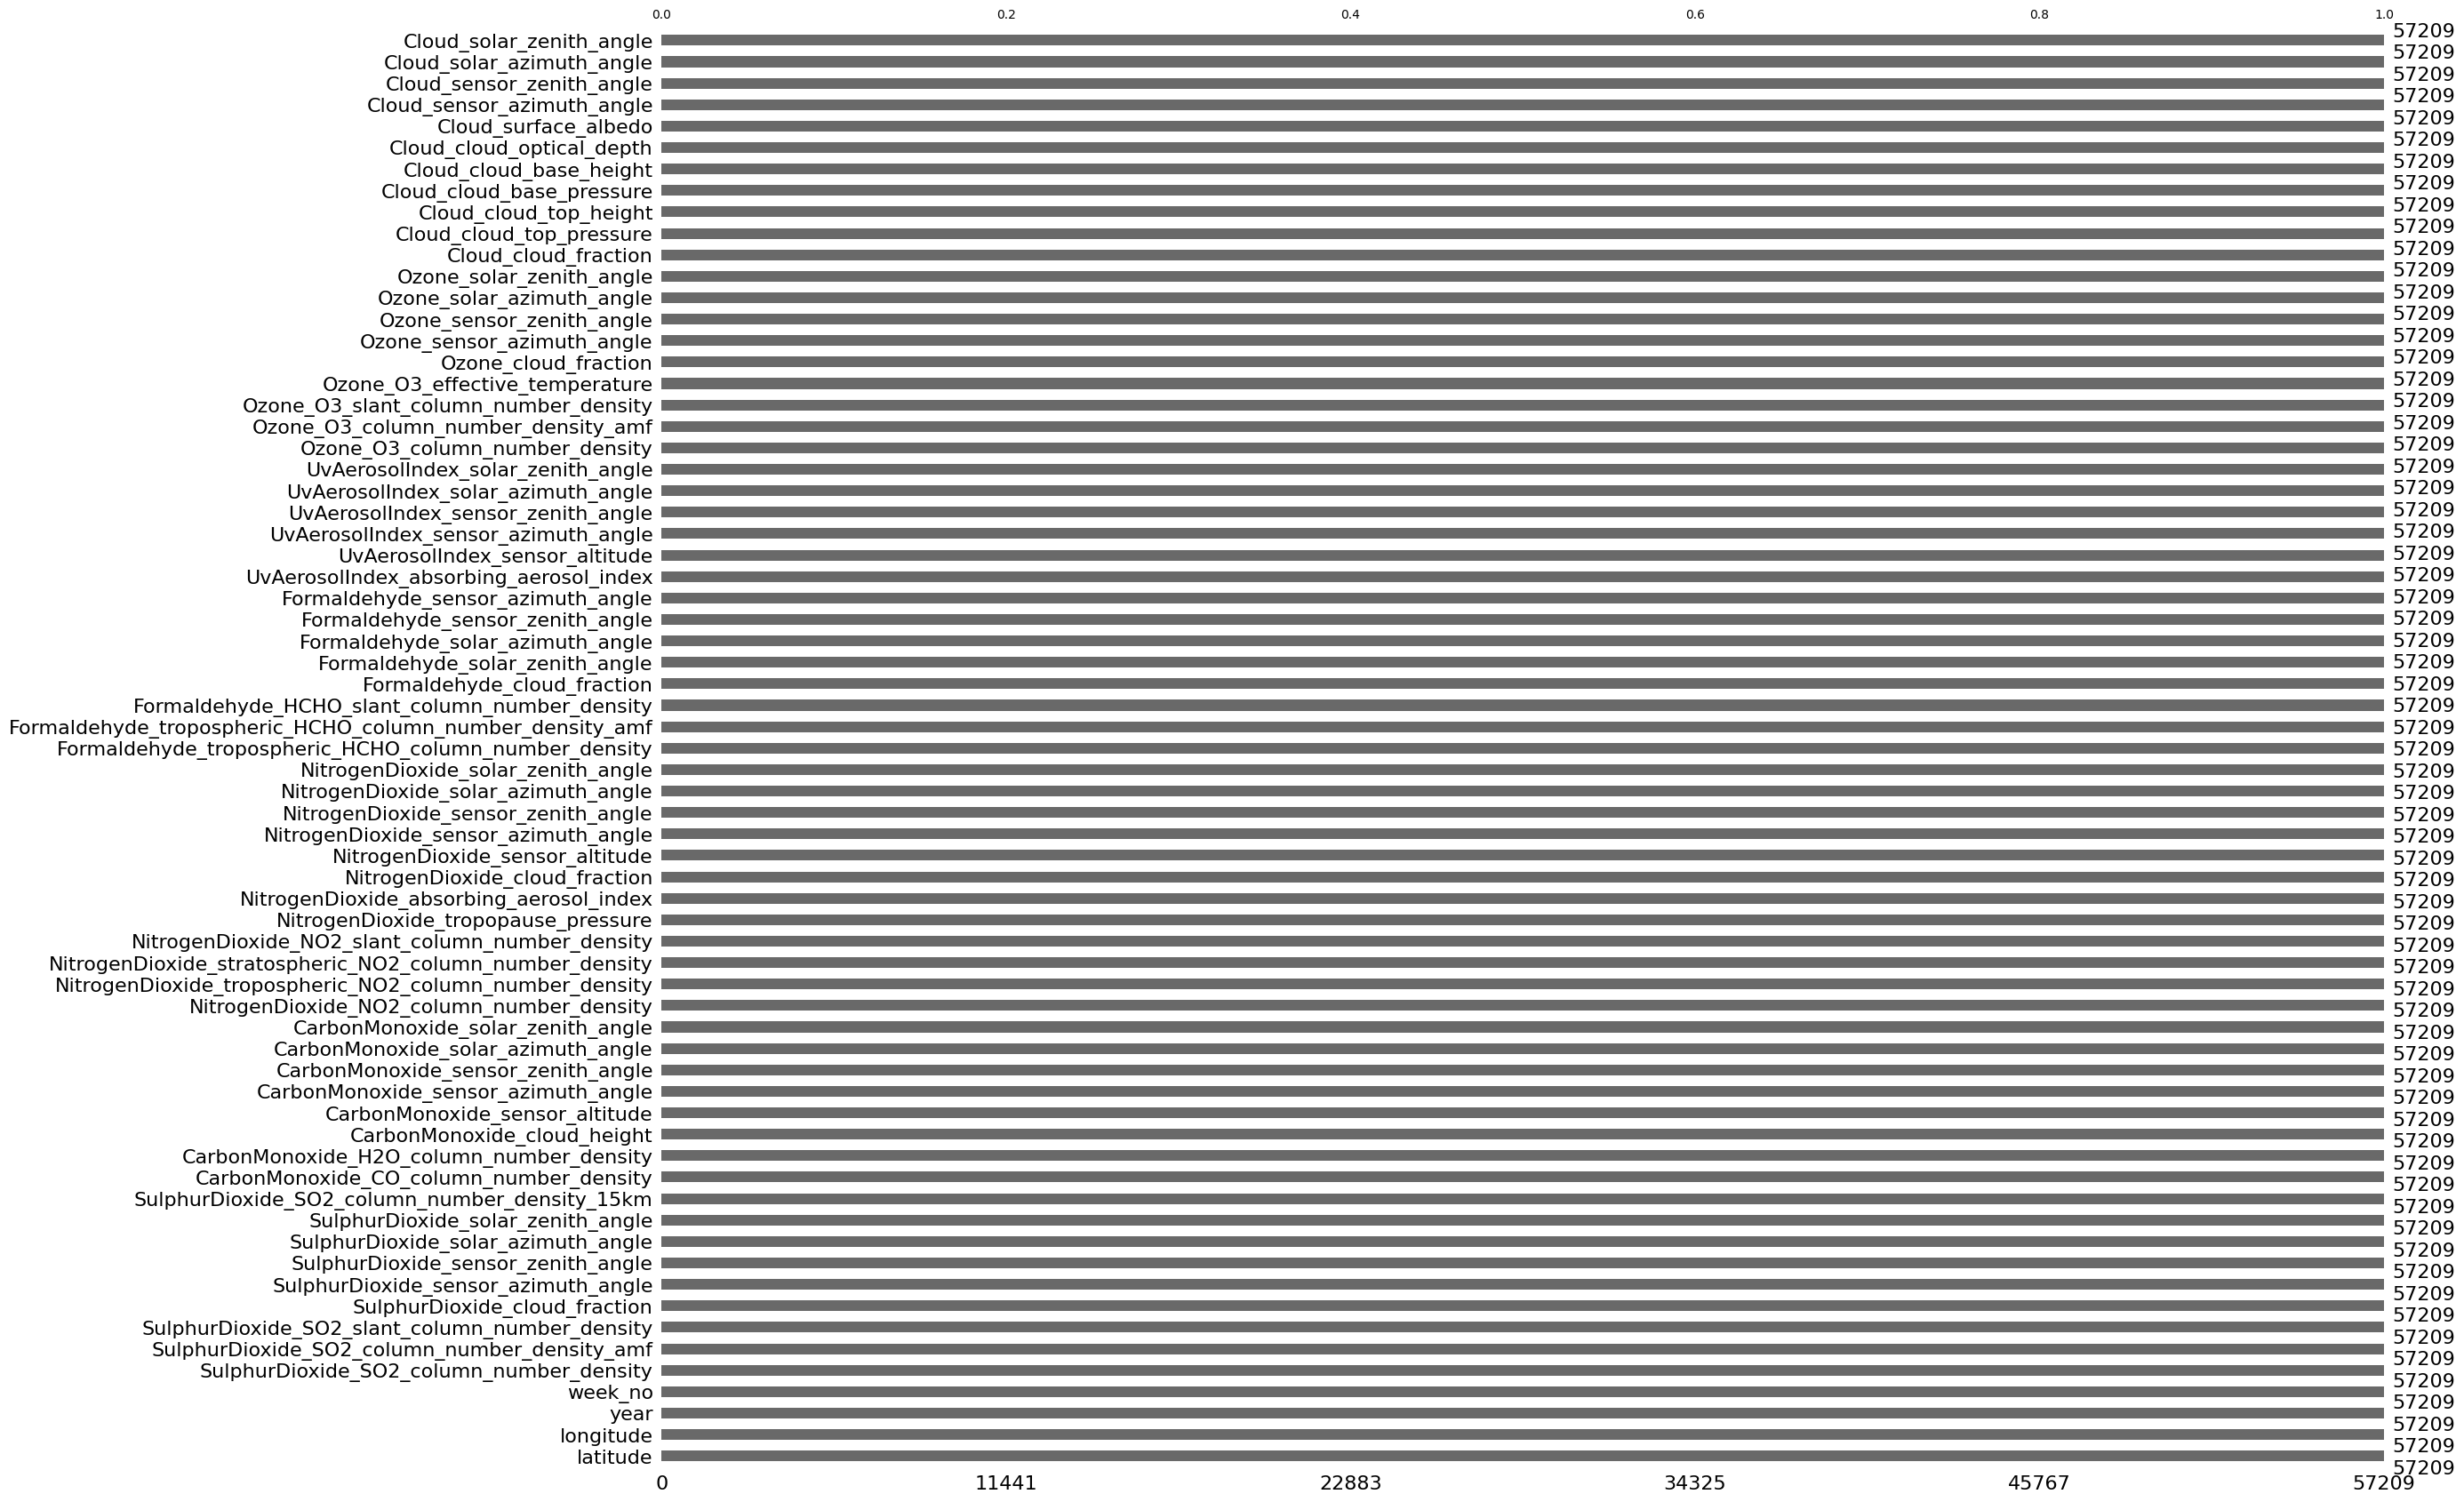

In [39]:
msno.bar(features_scaled_df);

## Split training data into training and validation

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

## Build model

Models to implement

1. SGD regressor

2. SVR

3. Ensemble regressor

4. Ridge regression

5. XGBoost

6. Neural network

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [42]:
# Initial build on all features to gain an insight to best performing model(s)
# Used model's default hyperparameters at first
models = {
    'SGD Regressor': SGDRegressor(random_state=1212),
    'SVR': SVR(),
    'Ensemble Regressor': RandomForestRegressor(random_state=1212),
    'Ridge Regression': Ridge(random_state=1212)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    acc = r2_score(y_val, y_pred)
    
    print(f"{name} RMSE: {rmse} and Accuracy: {acc}")

SGD Regressor RMSE: 129.01023531557473 and Accuracy: 0.03134738728766018


> RandomForestRegressor gave a much better initial performance

Implement XGBoost

In [ ]:
def train_xgboost_model(X_train, y_train, X_val, y_val, iteration):
    xg_train = xgb.DMatrix(X_train, label=y_train)
    xg_val = xgb.DMatrix(X_val, label=y_val)

    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8
    }

    iteration = iteration
    eval_results = {}

    def eval_metric_rmse(preds, train):
        labels = train.get_label()
        rmse = mean_squared_error(labels, preds, squared=False)
        return 'rmse', rmse

    model_xgb = xgb.train(params, xg_train, iteration, evals=[(xg_train, 'Train'), (xg_val, 'Validation')],
                          early_stopping_rounds=10, evals_result=eval_results, feval=eval_metric_rmse, verbose_eval=True)

    y_pred_xgb = model_xgb.predict(xg_val)

    rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
    print(f"XGBoost RMSE: {rmse_xgb}")
    print(f'XGBoost Accuracy: {r2_score(y_val, y_pred_xgb)}')

    # Plotting RMSE for each round
    train_rmse = eval_results['Train']['rmse']
    val_rmse = eval_results['Validation']['rmse']

    fig, ax = plt.subplots(figsize=(8, 5))
    plt.plot(train_rmse, label='Train RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.ylabel('RMSE')
    plt.title('RMSE per Round during XGBoost Training')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, iteration)
    plt.show()

    return model_xgb, eval_results, rmse_xgb, y_pred_xgb

[0]	Train-rmse:132.79831	Validation-rmse:123.75073
[1]	Train-rmse:125.60815	Validation-rmse:117.86186
[2]	Train-rmse:119.86079	Validation-rmse:112.90111
[3]	Train-rmse:114.46549	Validation-rmse:108.71730
[4]	Train-rmse:109.99287	Validation-rmse:104.84577
[5]	Train-rmse:106.19457	Validation-rmse:101.63926
[6]	Train-rmse:100.44872	Validation-rmse:96.45560
[7]	Train-rmse:97.75468	Validation-rmse:94.24935
[8]	Train-rmse:95.09370	Validation-rmse:91.55531
[9]	Train-rmse:92.65537	Validation-rmse:89.38109
[10]	Train-rmse:90.65273	Validation-rmse:87.77329
[11]	Train-rmse:87.76608	Validation-rmse:85.18593
[12]	Train-rmse:86.41258	Validation-rmse:84.03934
[13]	Train-rmse:85.80612	Validation-rmse:83.44144
[14]	Train-rmse:84.25363	Validation-rmse:82.15454
[15]	Train-rmse:82.75213	Validation-rmse:80.77891
[16]	Train-rmse:80.77761	Validation-rmse:78.99334
[17]	Train-rmse:79.64397	Validation-rmse:77.93603
[18]	Train-rmse:78.66457	Validation-rmse:77.02898
[19]	Train-rmse:75.87686	Validation-rmse:74.722

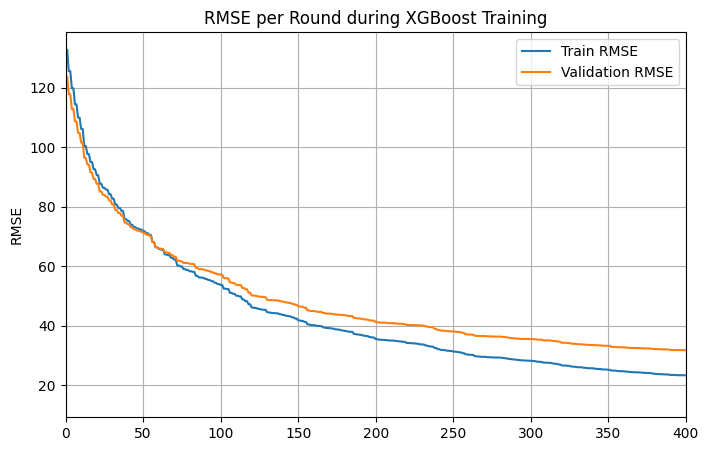

In [ ]:
model_xg, eval_results, rmse, y_pred_xgb = train_xgboost_model(X_train, y_train, X_val, y_val, 400)

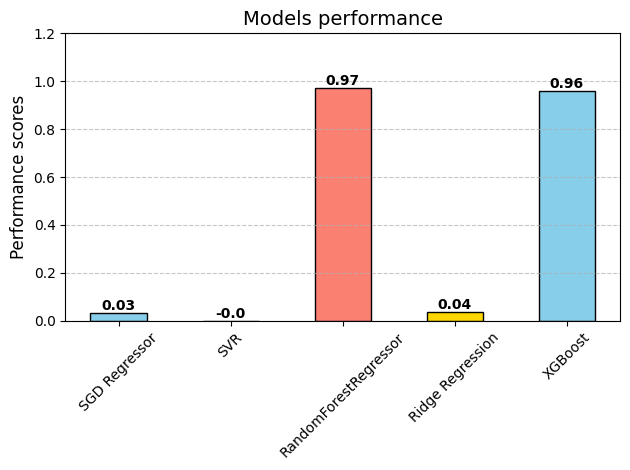

In [ ]:
mod = pd.DataFrame({'SGD Regressor': 0.032,
              'SVR': -0.002169,
              'RandomForestRegressor':0.972,
              'Ridge Regression': 0.036,
                    'XGBoost': 0.958
    
}, index=np.arange(1))

bars = plt.bar(dict(mod.iloc[0]).keys(), dict(mod.iloc[0]).values(), width=0.5, color=['skyblue', 'lightgreen', 'salmon', 'gold'], edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.2)  # Setting y-axis limits from 0 to 1 for better visualization of performance scores
# plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance scores', fontsize=12)
plt.title('Models performance', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# explore optimal n_estimator

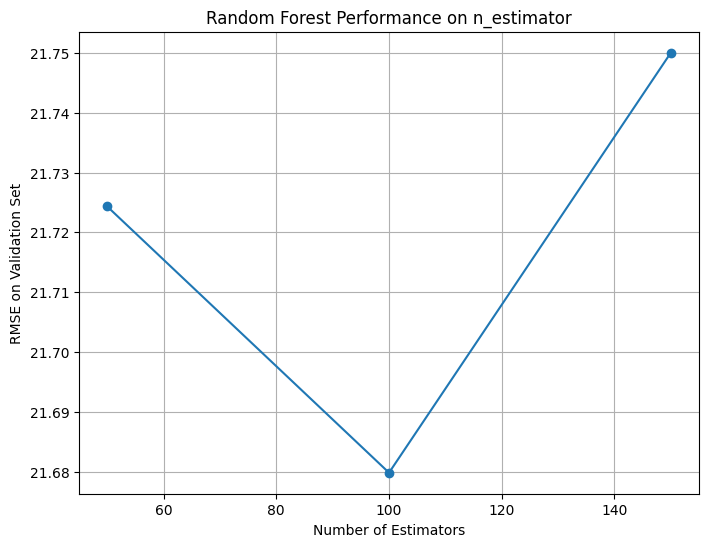

In [ ]:
rmse_values = []
estimators_range = [50, 100, 150]

for n in estimators_range:
    model_rf = RandomForestRegressor(n_estimators=n, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
    rmse_values.append(rmse)

plt.figure(figsize=(8, 6))
plt.plot(estimators_range, rmse_values, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE on Validation Set')
plt.title('Random Forest Performance on n_estimator')
plt.grid(True)
plt.show()

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_val, y_pred_rf)

0.972361245589903

In [ ]:
train_data['emission'].describe()

count    57209.000000
mean        82.428368
std        139.220813
min          0.000000
25%         11.053095
50%         46.732140
75%        110.524880
max       3167.768000
Name: emission, dtype: float64

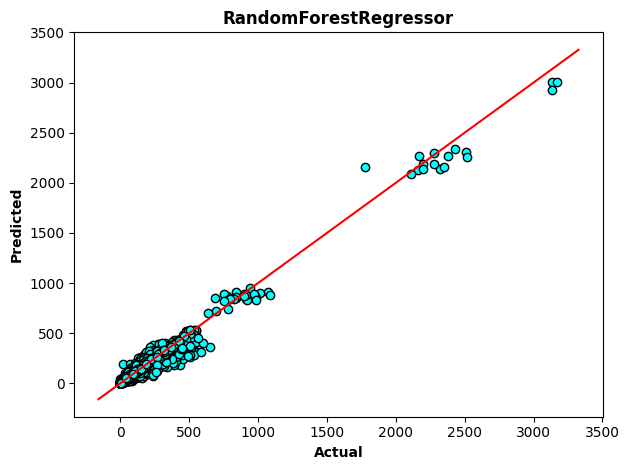

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=y_val, y=y_pred_rf, color = 'cyan', edgecolor='k')

ax.set_xlabel('Actual', fontweight='bold')
ax.set_ylabel('Predicted', fontweight='bold')
ax.set_title('RandomForestRegressor', fontweight='bold')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='red')
fig.tight_layout()
plt.show()

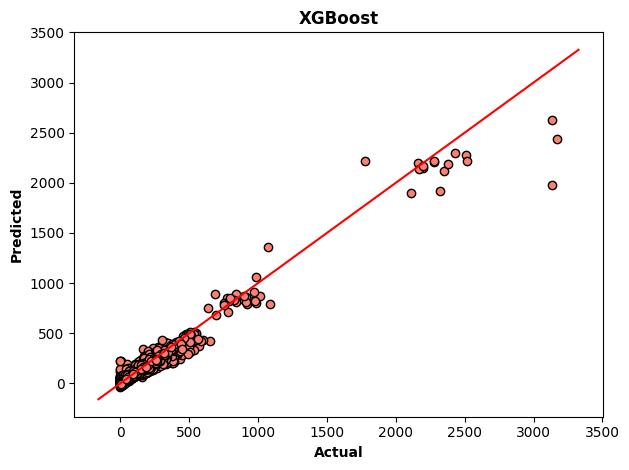

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_xgb, color = 'salmon', edgecolor='k')

ax.set_xlabel('Actual', fontweight='bold')
ax.set_ylabel('Predicted', fontweight='bold')
ax.set_title('XGBoost', fontweight='bold')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='red')
fig.tight_layout()

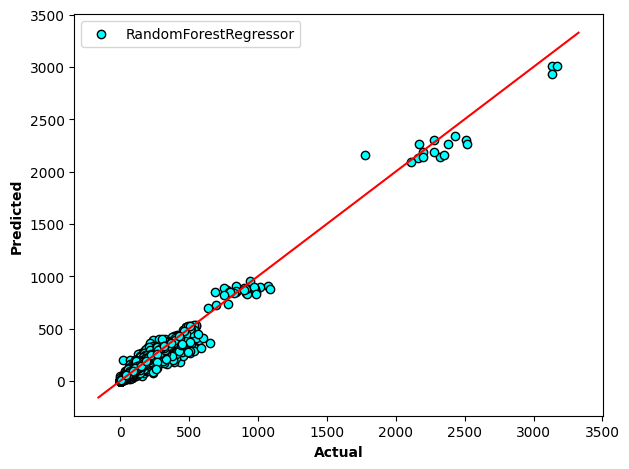

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_val, y_pred_rf, color = 'cyan', edgecolor='k', label='RandomForestRegressor')
ax.set_xlabel('Actual', fontweight='bold')
ax.set_ylabel('Predicted', fontweight='bold')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='red')
ax.legend()

plt.tight_layout()

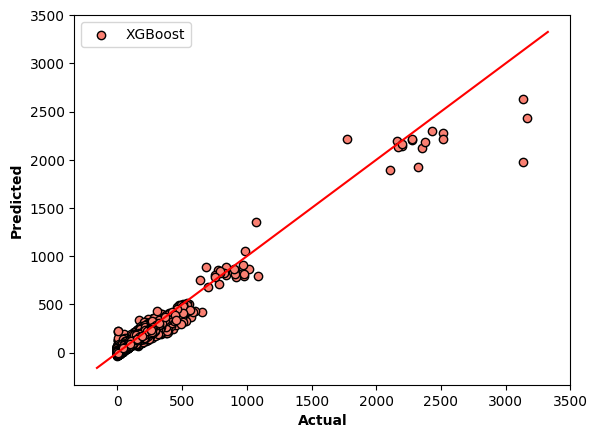

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_xgb, color = 'salmon', edgecolor='k', label='XGBoost')
ax.set_xlabel('Actual', fontweight='bold')
ax.set_ylabel('Predicted', fontweight='bold')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='red')
ax.legend()

## Feature importance for RandomForestRegressor

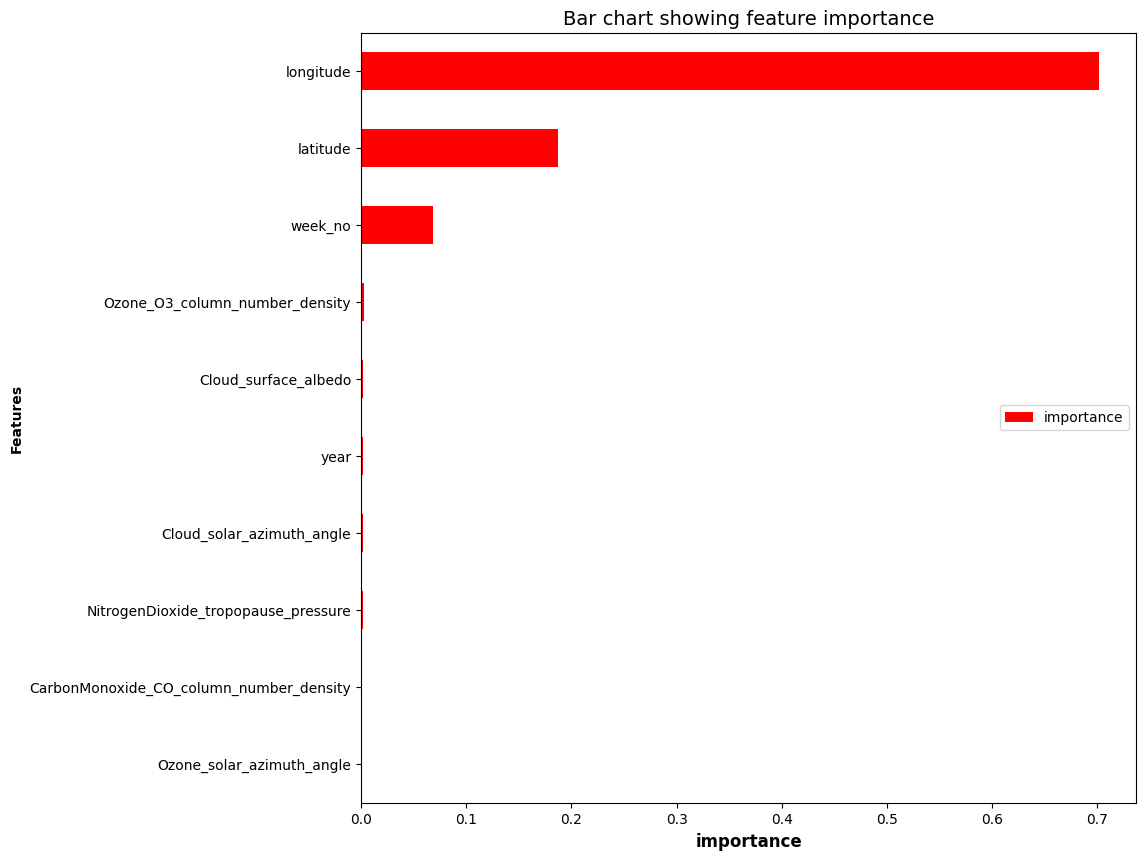

In [ ]:
impo_df = pd.DataFrame({'feature': features_scaled_df.columns, 'importance': model_rf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df_t10 = impo_df[:10].sort_values(by = 'importance', ascending = True)
impo_df_t10.plot(kind = 'barh', figsize = (10, 10), color='red')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('importance', fontsize = 12, fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.show()

## Build Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

def create_regression_model(X_train, y_train, X_val, y_val, epoch, learning_rate):
    model = Sequential([
        Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(750, activation='relu'),
        Dense(500, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Learning rate scheduler
    def lr_scheduler(epoch, lr):
        if epoch % 10 == 0 and epoch != 0:
            return lr * 0.9  # Adjust the learning rate every 10 epochs
        else:
            return lr

    lr_callback = LearningRateScheduler(lr_scheduler)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Model checkpoint
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val),
                        callbacks=[lr_callback, early_stopping, checkpoint], verbose=1)
    
    y_pred = model.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    print(f"Neural Network RMSE: {rmse}")
    print(f"Neural Network R^2 Score: {r2}")

    # Extracting loss values from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plotting loss for training and validation sets
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history


Epoch 1/100
1430/1431 [============================>.] - ETA: 0s - loss: 19352.7676
Epoch 1: val_loss improved from inf to 15661.89844, saving model to best_model.h5
1431/1431 [==============================] - 11s 7ms/step - loss: 19350.0996 - val_loss: 15661.8984 - lr: 0.0010
Epoch 2/100
1425/1431 [============================>.] - ETA: 0s - loss: 17983.7324
Epoch 2: val_loss improved from 15661.89844 to 14683.21875, saving model to best_model.h5
1431/1431 [==============================] - 10s 7ms/step - loss: 17943.8359 - val_loss: 14683.2188 - lr: 0.0010
Epoch 3/100
1424/1431 [============================>.] - ETA: 0s - loss: 17204.3809
Epoch 3: val_loss improved from 14683.21875 to 14425.96875, saving model to best_model.h5
1431/1431 [==============================] - 10s 7ms/step - loss: 17252.8301 - val_loss: 14425.9688 - lr: 0.0010
Epoch 4/100
1427/1431 [============================>.] - ETA: 0s - loss: 16634.4043
Epoch 4: val_loss did not improve from 14425.96875
1431/1431 [=

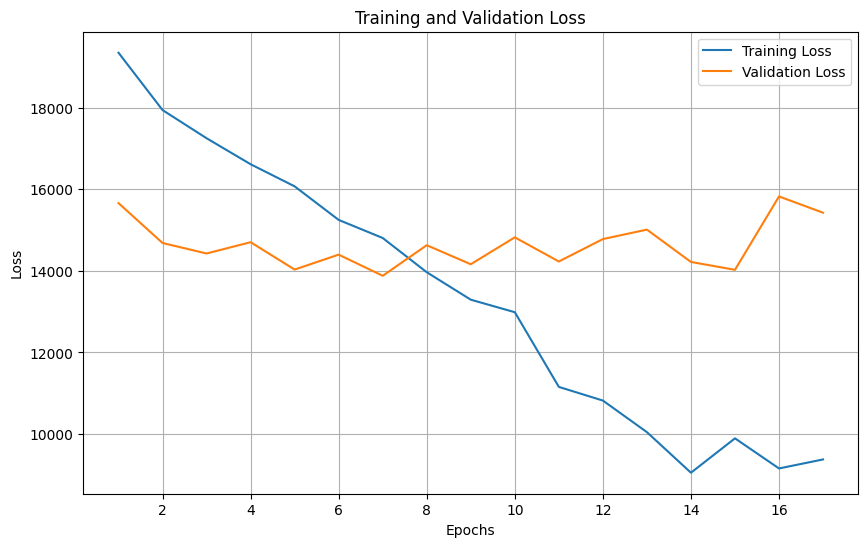

In [ ]:
model_nn, history = create_regression_model(X_train, y_train, X_val, y_val, 100, 0.001)

## Performance with all features

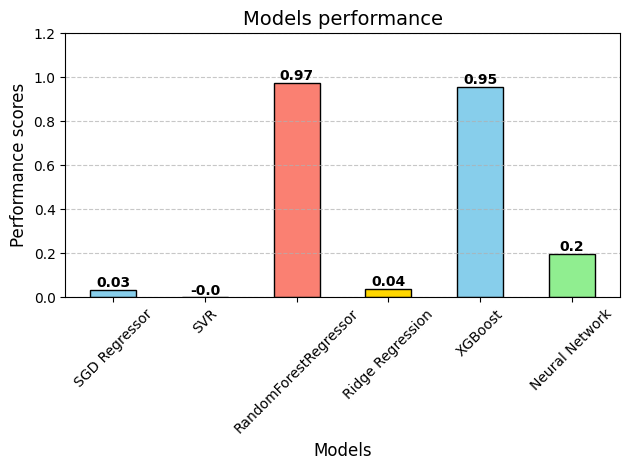

In [ ]:
mod2 = pd.DataFrame({'SGD Regressor': 0.031,
              'SVR': -0.004,
              'RandomForestRegressor':0.972,
              'Ridge Regression': 0.036,
                    'XGBoost': 0.954,
                    'Neural Network': 0.198
    
}, index=np.arange(1))


bars2 = plt.bar(dict(mod2.iloc[0]).keys(), dict(mod2.iloc[0]).values(), width=0.5, color=['skyblue', 'lightgreen', 'salmon', 'gold'], edgecolor='black')

# Adding data labels on top of each bar
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.2)  # Setting y-axis limits from 0 to 1 for better visualization of performance scores
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance scores', fontsize=12)
plt.title('Models performance', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Sample top 10 features basd on feature importance

In [ ]:
impo_df

importance
feature                                       
longitude                             0.701738
latitude                              0.187718
week_no                               0.068589
Ozone_O3_column_number_density        0.003089
Cloud_surface_albedo                  0.001602
...                                        ...
Ozone_sensor_zenith_angle             0.000258
NitrogenDioxide_solar_zenith_angle    0.000256
Ozone_O3_column_number_density_amf    0.000249
SulphurDioxide_solar_zenith_angle     0.000230
UvAerosolIndex_sensor_zenith_angle    0.000226

[67 rows x 1 columns]

In [ ]:
new_train = features_scaled_df[impo_df.index[:10]]

In [ ]:
new_train.shape, train_data['emission'].shape

((57209, 10), (57209,))

In [ ]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(new_train, train_data.dropna()['emission'], test_size=0.2, random_state=1296)

In [ ]:
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape

((45767, 10), (45767,), (11442, 10), (11442,))

Epoch 1/100


1429/1431 [============================>.] - ETA: 0s - loss: 16505.5820
Epoch 1: val_loss improved from inf to 20493.32031, saving model to best_model.h5
1431/1431 [==============================] - 11s 7ms/step - loss: 16499.4766 - val_loss: 20493.3203 - lr: 0.0010
Epoch 2/100
1429/1431 [============================>.] - ETA: 0s - loss: 14983.3574
Epoch 2: val_loss improved from 20493.32031 to 18704.37695, saving model to best_model.h5
1431/1431 [==============================] - 9s 7ms/step - loss: 14980.4990 - val_loss: 18704.3770 - lr: 0.0010
Epoch 3/100
1425/1431 [============================>.] - ETA: 0s - loss: 14522.1064
Epoch 3: val_loss improved from 18704.37695 to 17738.57227, saving model to best_model.h5
1431/1431 [==============================] - 10s 7ms/step - loss: 14496.8105 - val_loss: 17738.5723 - lr: 0.0010
Epoch 4/100
1425/1431 [============================>.] - ETA: 0s - loss: 14033.7197
Epoch 4: val_loss did not improve from 17738.57227
1431/1431 [==============

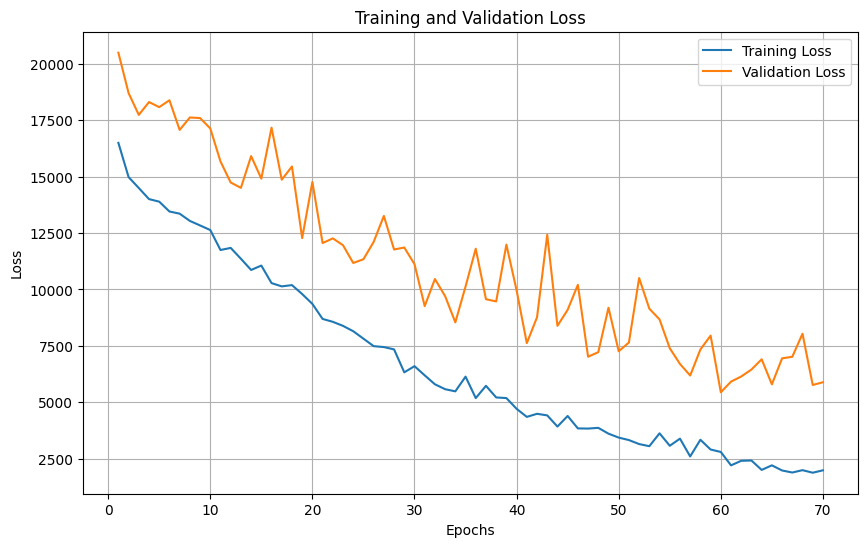

In [ ]:
model_nn2, history2 = create_regression_model(X_train2, y_train2, X_val2, y_val2, 100, 0.001)

RandomForest

In [ ]:
model_rf2 = RandomForestRegressor(n_estimators=100).fit(X_train2, y_train2)
y_pred_rf2 = model_rf2.predict(X_val2)
r2_score(y_val2, y_pred_rf2)

0.9879879150390832

XGBoost

[0]	Train-rmse:130.95691	Validation-rmse:149.83566
[1]	Train-rmse:124.41208	Validation-rmse:142.52789


[2]	Train-rmse:121.64169	Validation-rmse:139.46817
[3]	Train-rmse:114.36006	Validation-rmse:129.80037
[4]	Train-rmse:109.70779	Validation-rmse:124.62266
[5]	Train-rmse:105.57006	Validation-rmse:120.07594
[6]	Train-rmse:101.99584	Validation-rmse:116.16074
[7]	Train-rmse:97.15694	Validation-rmse:109.33055
[8]	Train-rmse:96.80515	Validation-rmse:109.10422
[9]	Train-rmse:96.16915	Validation-rmse:108.55827
[10]	Train-rmse:91.76753	Validation-rmse:102.36726
[11]	Train-rmse:91.46413	Validation-rmse:102.19531
[12]	Train-rmse:87.33193	Validation-rmse:96.51459
[13]	Train-rmse:83.96207	Validation-rmse:91.79761
[14]	Train-rmse:81.09992	Validation-rmse:87.71837
[15]	Train-rmse:79.38400	Validation-rmse:85.83356
[16]	Train-rmse:77.86195	Validation-rmse:84.24676
[17]	Train-rmse:76.38242	Validation-rmse:82.71775
[18]	Train-rmse:76.06435	Validation-rmse:82.54159
[19]	Train-rmse:74.28005	Validation-rmse:80.33382
[20]	Train-rmse:72.26343	Validation-rmse:77.36736
[21]	Train-rmse:70.50551	Validation-rmse:74

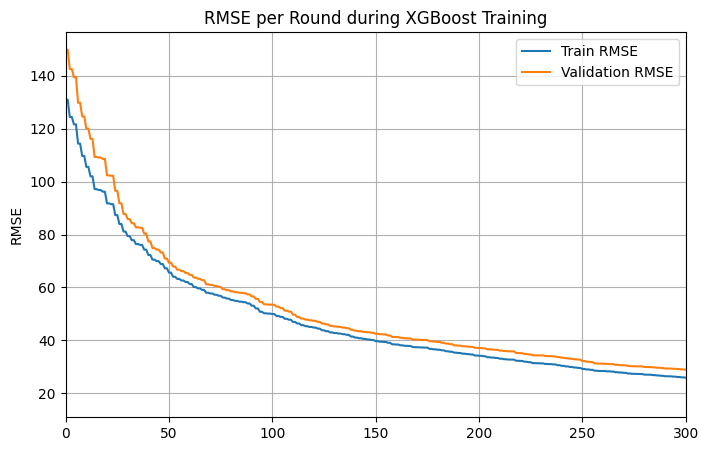

In [ ]:
model_xg2, eval_results2, rmse2, y_pred_xg2 = train_xgboost_model(X_train2, y_train2, X_val2, y_val2, 300)

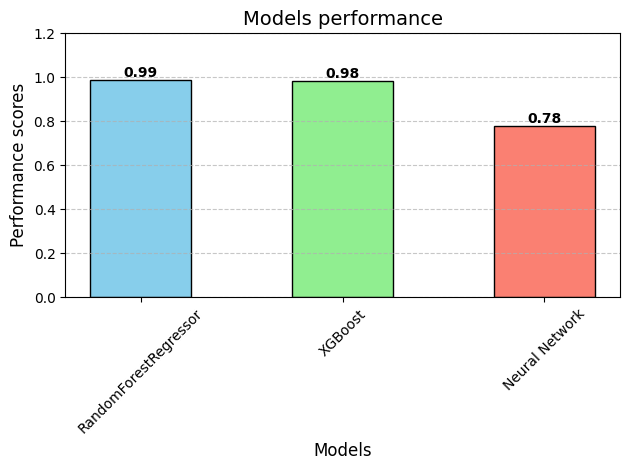

In [ ]:
mod2 = pd.DataFrame({'RandomForestRegressor':0.988,
                    'XGBoost': 0.981,
                    'Neural Network': 0.780
    
}, index=np.arange(1))


bars2 = plt.bar(dict(mod2.iloc[0]).keys(), dict(mod2.iloc[0]).values(), width=0.5, color=['skyblue', 'lightgreen', 'salmon', 'gold'], edgecolor='black')

# Adding data labels on top of each bar
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.2)  # Setting y-axis limits from 0 to 1 for better visualization of performance scores
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance scores', fontsize=12)
plt.title('Models performance', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Check top 5 important features

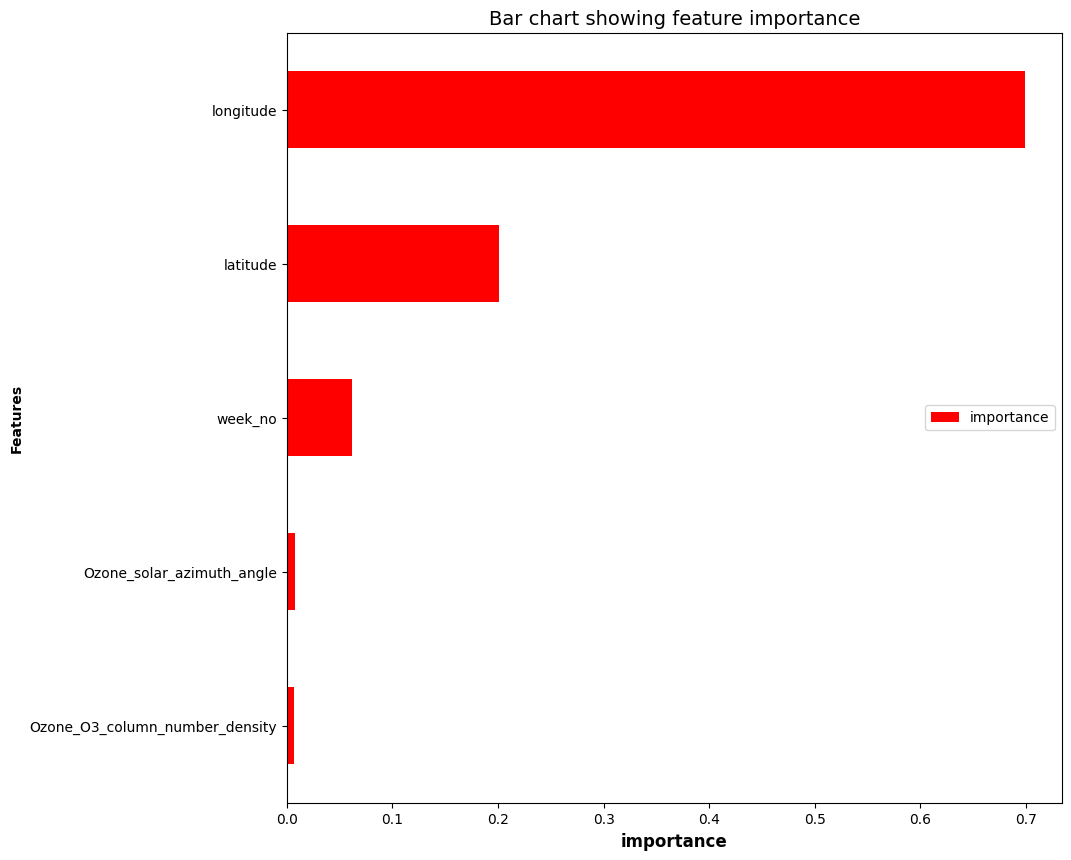

In [ ]:
impo_df = pd.DataFrame({'feature': new_train.columns, 'importance': model_rf2.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df_t10 = impo_df[:5].sort_values(by = 'importance', ascending = True)
impo_df_t10.plot(kind = 'barh', figsize = (10, 10), color='red')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('importance', fontsize = 12, fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.show()

Build models with the top 5 features

In [ ]:
new_train2 = new_train[impo_df.index[:5]]

X_train3, X_val3, y_train3, y_val3 = train_test_split(new_train2, train_data['emission'], test_size=0.2, random_state=1212)

RandomForestRegressor

In [ ]:
model_rf3 = RandomForestRegressor().fit(X_train3, y_train3)
y_pred_rf3 = model_rf3.predict(X_val3)
r2_score(y_val3, y_pred_rf3)

0.9834552100412243

Neural network

Epoch 1/100
1427/1431 [============================>.] - ETA: 0s - loss: 17495.5801
Epoch 1: val_loss improved from inf to 18270.85938, saving model to best_model.h5
1431/1431 [==============================] - 10s 7ms/step - loss: 17474.2500 - val_loss: 18270.8594 - lr: 0.0100
Epoch 2/100
1424/1431 [============================>.] - ETA: 0s - loss: 16255.3945
Epoch 2: val_loss improved from 18270.85938 to 16427.83008, saving model to best_model.h5
1431/1431 [==============================] - 9s 7ms/step - loss: 16217.0371 - val_loss: 16427.8301 - lr: 0.0100
Epoch 3/100
1425/1431 [============================>.] - ETA: 0s - loss: 15842.2246
Epoch 3: val_loss did not improve from 16427.83008
1431/1431 [==============================] - 9s 7ms/step - loss: 15849.6533 - val_loss: 16668.5664 - lr: 0.0100
Epoch 4/100
1426/1431 [============================>.] - ETA: 0s - loss: 15399.5625
Epoch 4: val_loss improved from 16427.83008 to 16153.99414, saving model to best_model.h5
1431/1431 [===

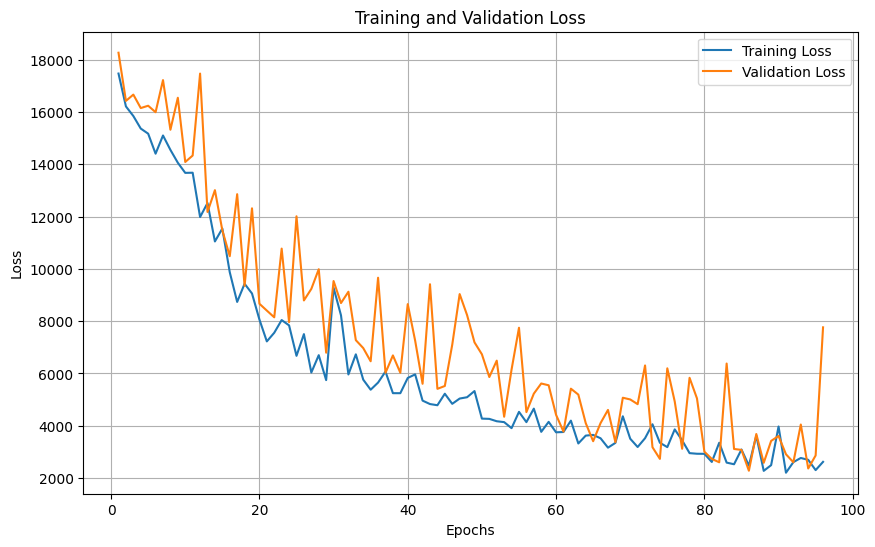

In [ ]:
model_nn3, history3 = create_regression_model(X_train3, y_train3, X_val3, y_val3, 100, 0.01)

XGBoost

[0]	Train-rmse:131.12080	Validation-rmse:135.72623


[1]	Train-rmse:124.49390	Validation-rmse:130.97221
[2]	Train-rmse:116.86541	Validation-rmse:122.46151
[3]	Train-rmse:110.33151	Validation-rmse:115.25137
[4]	Train-rmse:104.81813	Validation-rmse:109.28460
[5]	Train-rmse:103.24559	Validation-rmse:108.03877
[6]	Train-rmse:99.22789	Validation-rmse:105.03675
[7]	Train-rmse:95.97797	Validation-rmse:102.70382
[8]	Train-rmse:93.08302	Validation-rmse:100.55841
[9]	Train-rmse:92.47390	Validation-rmse:100.05892
[10]	Train-rmse:90.05788	Validation-rmse:98.28612
[11]	Train-rmse:89.49530	Validation-rmse:97.81461
[12]	Train-rmse:85.53612	Validation-rmse:92.68607
[13]	Train-rmse:83.51527	Validation-rmse:91.08926
[14]	Train-rmse:82.01492	Validation-rmse:89.83628
[15]	Train-rmse:79.08761	Validation-rmse:85.74217
[16]	Train-rmse:77.40704	Validation-rmse:83.86436
[17]	Train-rmse:76.64120	Validation-rmse:83.16676
[18]	Train-rmse:75.36566	Validation-rmse:82.16368
[19]	Train-rmse:73.02299	Validation-rmse:78.69529
[20]	Train-rmse:71.20375	Validation-rmse:75.9

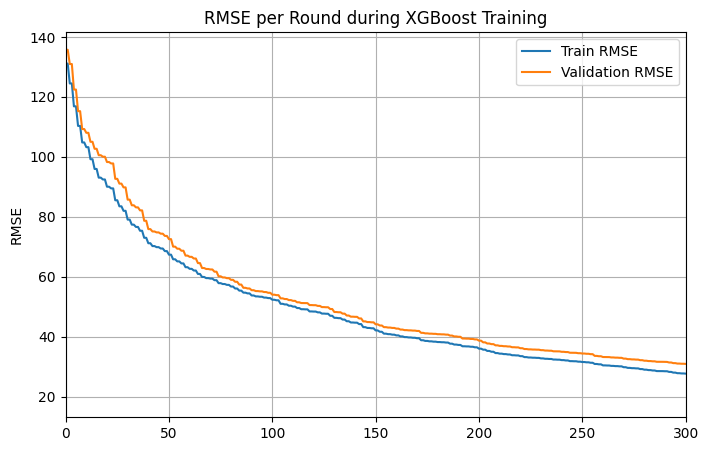

In [ ]:
model_xg3, eval_results3, rmse3, y_pred_xg3 = train_xgboost_model(X_train3, y_train3, X_val3, y_val3, 300)

Visualize model performance with top 5 features

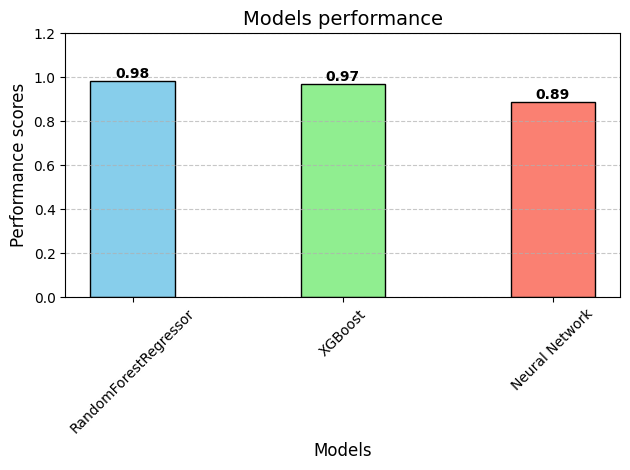

In [ ]:
mod2 = pd.DataFrame({
              'RandomForestRegressor':0.984,
                    'XGBoost': 0.971,
                    'Neural Network': 0.89
    
}, index=np.arange(1))


bars2 = plt.bar(dict(mod2.iloc[0]).keys(), dict(mod2.iloc[0]).values(), width=0.4, color=['skyblue', 'lightgreen', 'salmon', 'gold'], edgecolor='black')

# Adding data labels on top of each bar
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.2)  # Setting y-axis limits from 0 to 1 for better visualization of performance scores
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance scores', fontsize=12)
plt.title('Models performance', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##  EMISSION PREDICTION ON THE TEST DATASET

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data_copy = test_data.copy()

In [ ]:
test_data_copy.shape

(24353, 75)

In [ ]:
test_data_copy.describe()

latitude     longitude     year       week_no  \
count  24353.000000  24353.000000  24353.0  24353.000000   
mean      -1.891072     29.880155   2022.0     24.000000   
std        0.694532      0.810387      0.0     14.142426   
min       -3.299000     28.228000   2022.0      0.000000   
25%       -2.451000     29.262000   2022.0     12.000000   
50%       -1.882000     29.883000   2022.0     24.000000   
75%       -1.303000     30.471000   2022.0     36.000000   
max       -0.510000     31.532000   2022.0     48.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              18211.000000   
mean                                   0.000014   
std                                    0.000234   
min                                   -0.000977   
25%                                   -0.000122   
50%                                    0.000007   
75%                                    0.000137   
max                                    0.004110   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  18211.000000   
mean                                       0.792570   
std                                        0.168043   
min                                        0.339845   
25%                                        0.678384   
50%                                        0.763307   
75%                                        0.872586   
max                                        1.696826   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    18211.000000   
mean                                         0.000009   
std                                          0.000170   
min                                         -0.000775   
25%                                         -0.000094   
50%                                          0.000004   
75%                                          0.000104   
max                                          0.002701   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   18211.000000                         18211.000000   
mean                        0.139218                             9.298052   
std                         0.079865                            67.148199   
min                         0.000000                          -106.809900   
25%                         0.078934                           -41.627297   
50%                         0.138999                            16.857963   
75%                         0.200819                            73.664560   
max                         0.299973                           157.503026   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
count                        18211.000000  ...              24187.000000   
mean                            36.174307  ...              52291.369823   
std                             14.156478  ...               8474.312135   
min                              0.099606  ...              22968.371094   
25%                             26.577654  ...              46443.513511   
50%                             37.310447  ...              52026.814647   
75%                             45.972595  ...              57814.509397   
max                             66.243271  ...              83092.004251   

       Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
count            24187.000000               24187.000000   
mean              5850.560884               58914.750636   
std               1385.456558                9137.478850   
min               1748.440552               26601.015625   
25%               4891.547765               52564.911002   
50%               5813.010892               58725.298896   
75%               6780.095125               64998.470002   
max              11840.539740               88543.121457   

       Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
count             2

In [ ]:
test_data_copy.head().T

0  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2022_00   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2022   
week_no                                            0   
...                                              ...   
Cloud_surface_albedo                        0.240773   
Cloud_sensor_azimuth_angle               -100.113792   
Cloud_sensor_zenith_angle                  33.697044   
Cloud_solar_azimuth_angle                -133.047546   
Cloud_solar_zenith_angle                   33.779583   

                                                   1  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2022_01   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2022   
week_no                                            1   
...                                              ...   
Cloud_surface_albedo                        0.293119   
Cloud_sensor_azimuth_angle                -30.510319   
Cloud_sensor_zenith_angle                  42.402593   
Cloud_solar_azimuth_angle                -138.632822   
Cloud_solar_zenith_angle                    31.01238   

                                                   2  \
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2022_02   
latitude                                       -0.51   
longitude                                      29.29   
year                                            2022   
week_no                                            2   
...                                              ...   
Cloud_surface_albedo                         0.26713   
Cloud_sensor_azimuth_angle                 39.087361   
Cloud_sensor_zenith_angle                   45.93648   
Cloud_solar_azimuth_angle                -144.784988   
Cloud_solar_zenith_angle                   26.743361   

                                                   3                         4  
ID_LAT_LON_YEAR_WEEK        ID_-0.510_29.290_2022_03  ID_-0.510_29.290_2022_04  
latitude                                       -0.51                     -0.51  
longitude                                      29.29                     29.29  
year                                            2022                      2022  
week_no                                            3                         4  
...                                              ...                       ...  
Cloud_surface_albedo                        0.304679                  0.284221  
Cloud_sensor_azimuth_angle                -24.465127                 -12.90785  
Cloud_sensor_zenith_angle                  42.140419                 30.122641  
Cloud_solar_azimuth_angle                -135.027891               -135.500119  
Cloud_solar_zenith_angle                   29.604774                 26.276807  

[75 rows x 5 columns]

In [ ]:
test_data.shape, train_data.shape

((24353, 75), (57209, 68))

Extract columns used for training the first set of models with all features

In [ ]:
cols = [col for col in test_data.columns if col not in train_data.columns]

In [ ]:
cols

['ID_LAT_LON_YEAR_WEEK',
 'UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

In [ ]:
test_data.drop(cols[1:], axis=1, inplace=True)

In [ ]:
test_data.shape, train_data.shape

((24353, 68), (57209, 68))

Visualize missing data

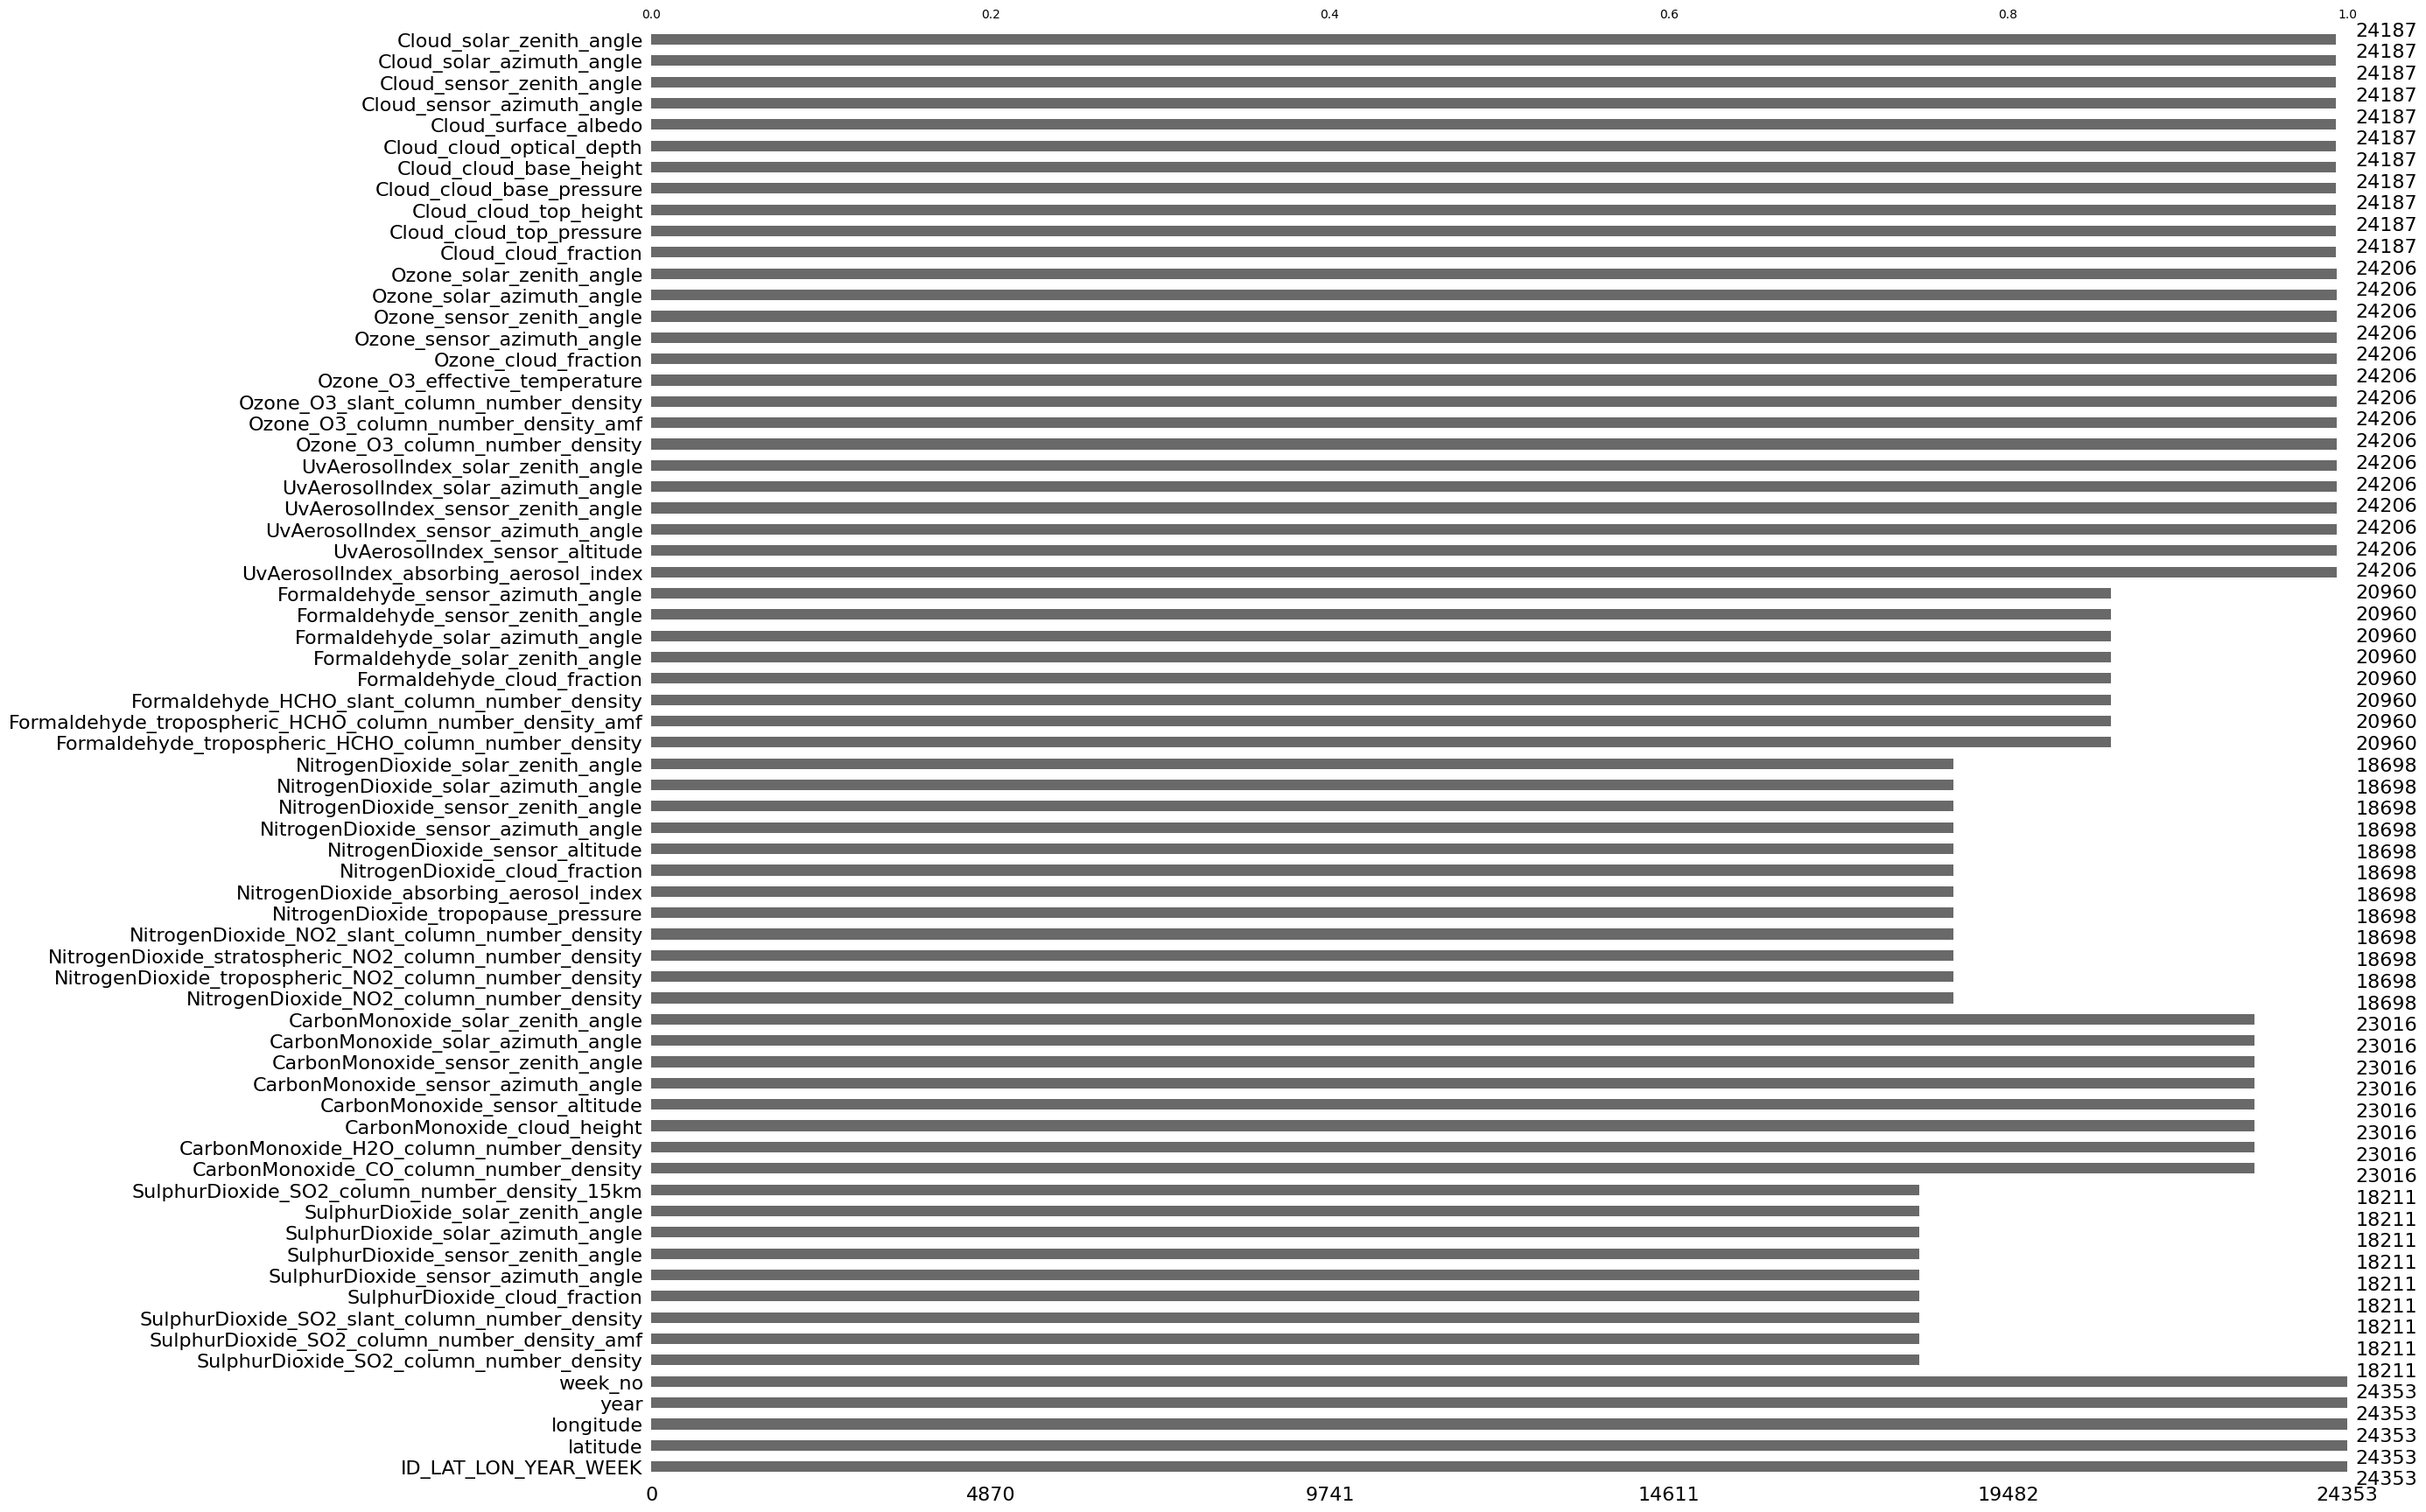

In [ ]:
msno.bar(test_data);

Drop missing data

In [ ]:
test_data = test_data.dropna()

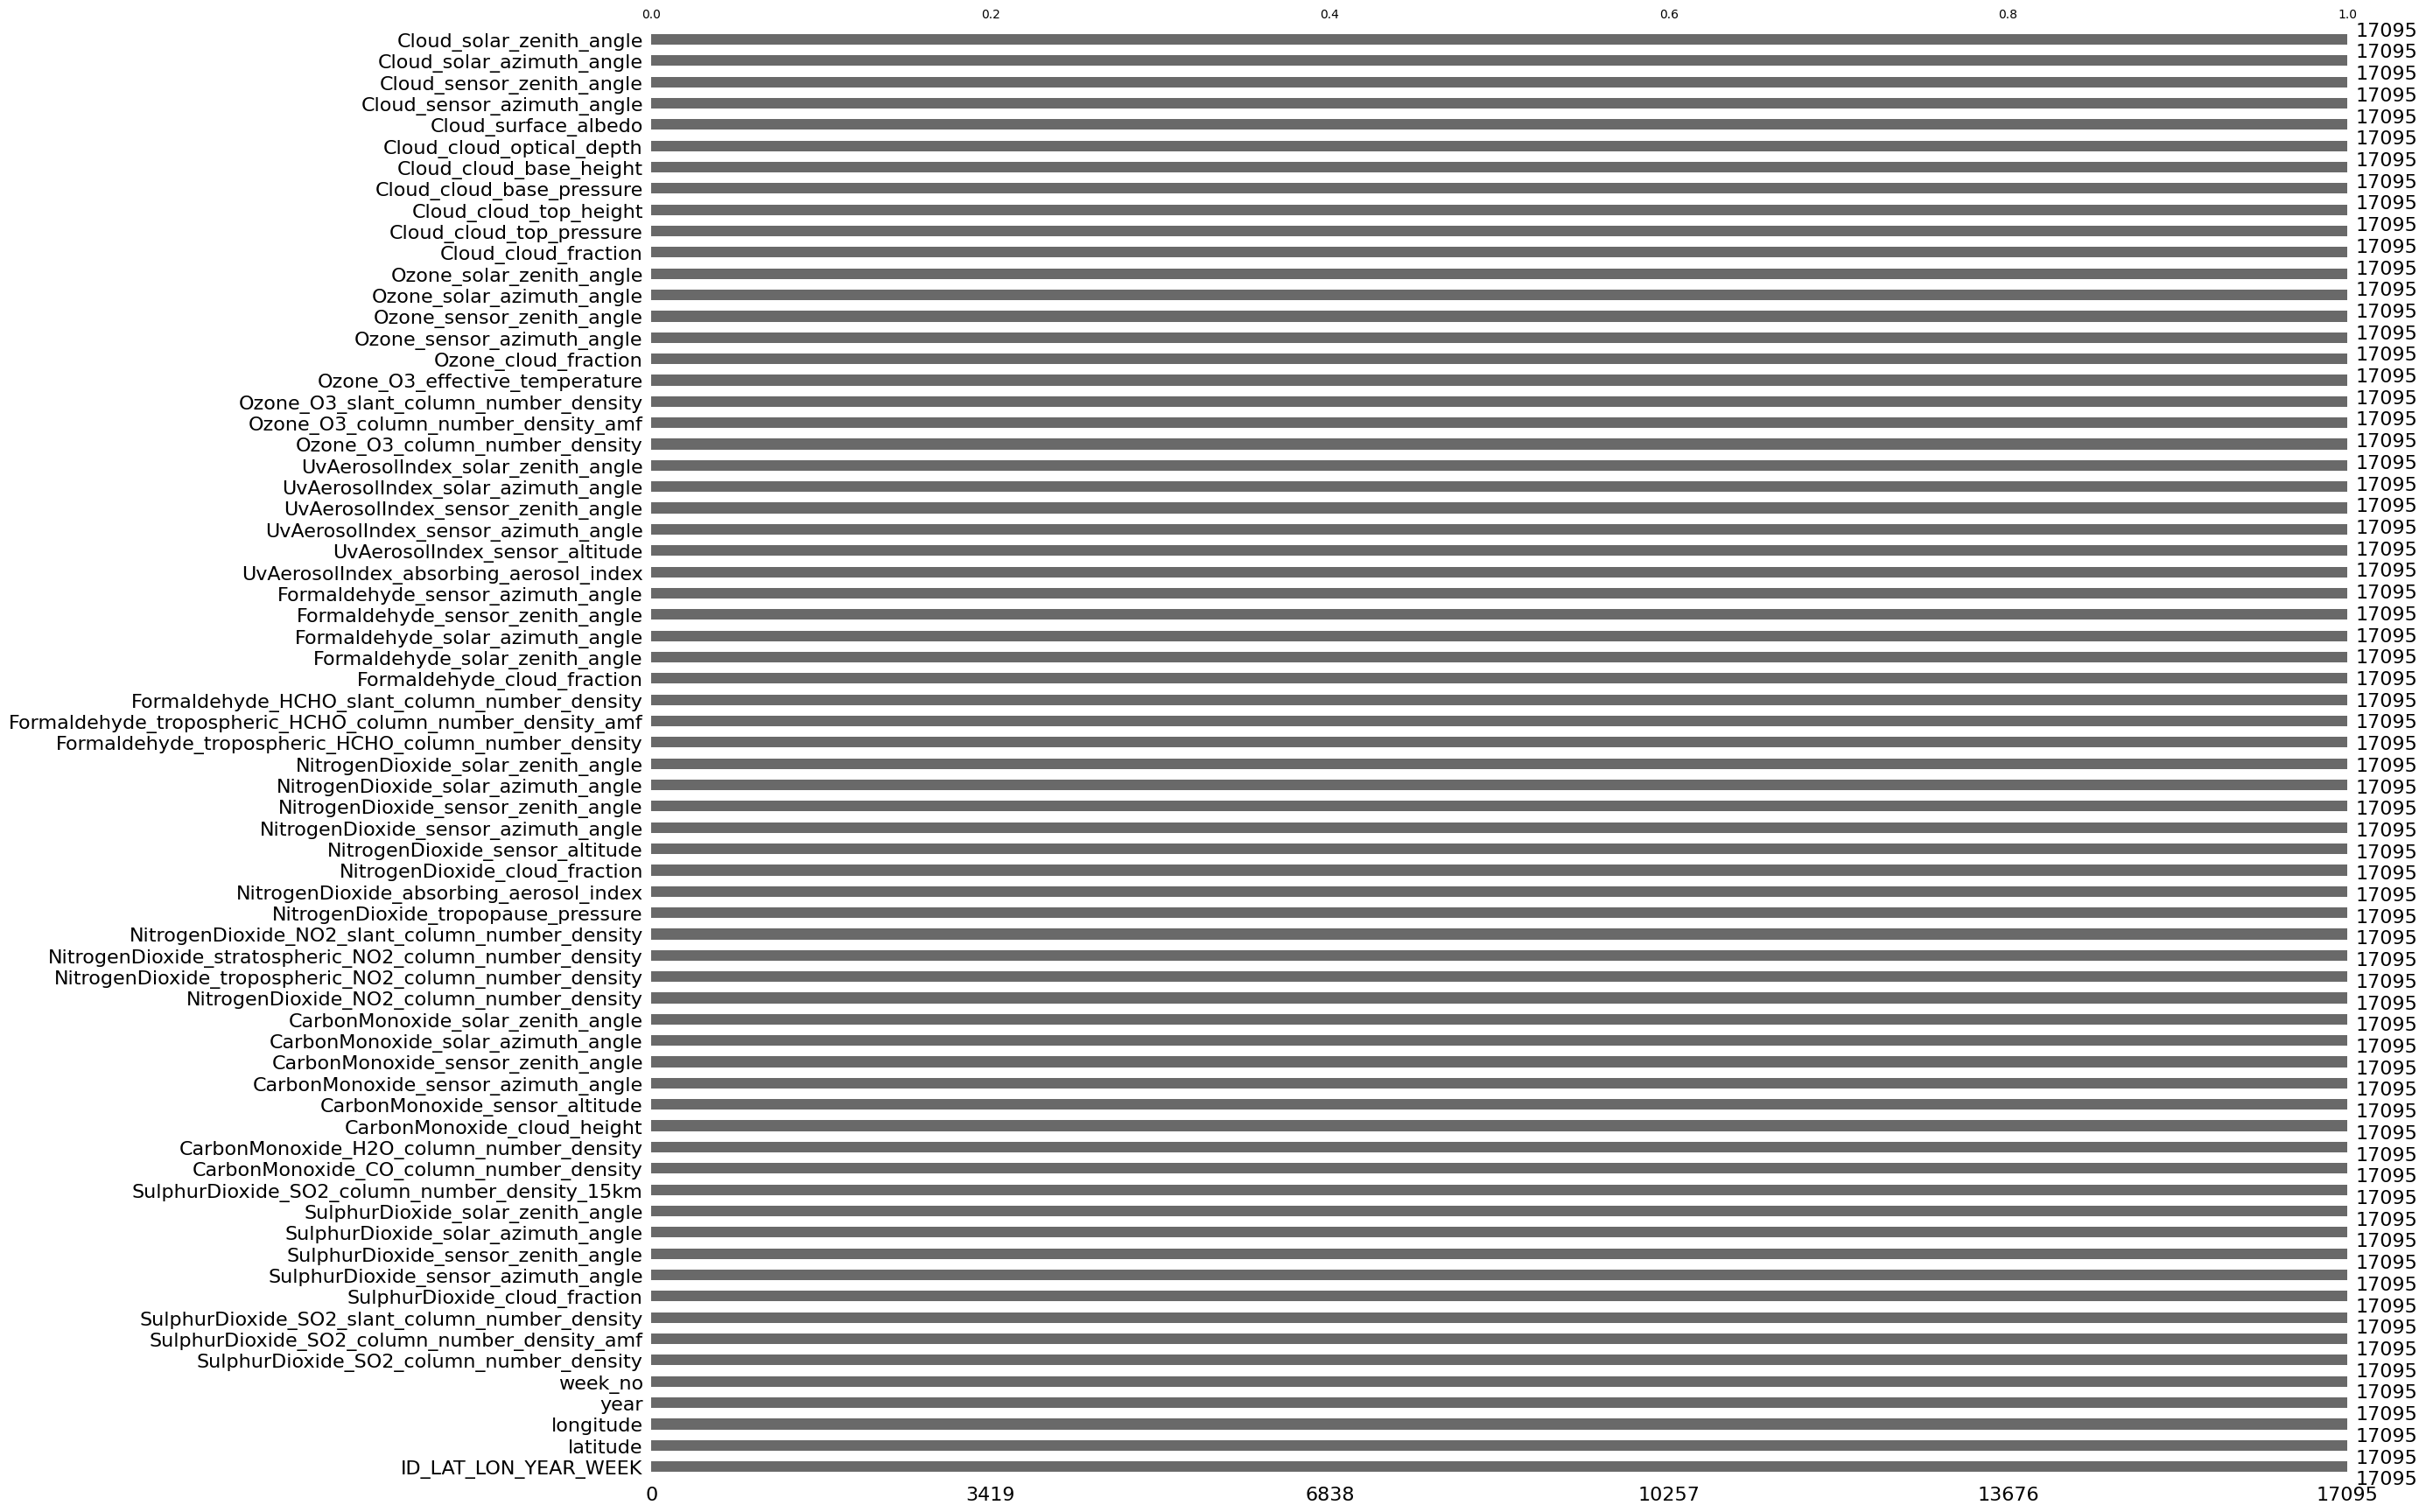

In [ ]:
msno.bar(test_data);

## Using RandomForestRegressor to predict emission on the test dataset and compare the prediction with emission of 2019, 2020, and 2021

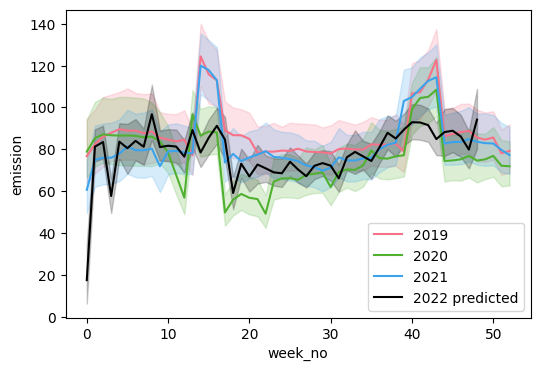

In [ ]:
pred_df_scaled_all = pd.DataFrame({test_data.columns[0]: test_data['ID_LAT_LON_YEAR_WEEK'],
              'Predicted Emission': model_rf.predict(StandardScaler().fit_transform(test_data.drop('ID_LAT_LON_YEAR_WEEK', axis=1))),
                           'week': test_data['week_no']
    
})

palette = sb.color_palette("husl", len(train_data_copy['year'].unique()))
fig, ax = plt.subplots(figsize=(6,4))
sb.lineplot(data=train_data_copy, x = 'week_no', 
            y = 'emission',
            hue='year',
           palette = palette);

sb.lineplot(data=pred_df_scaled_all, x ='week', 
            y = 'Predicted Emission',
           palette = palette, color='k', label='2022 predicted');

plt.legend();

## EXTRACT THE FIVE FEATURES USED TO TRAIN THE LAST MODEL

In [ ]:
cols2 = [col for col in test_data.columns if col not in new_train2.columns]
test_data2 = test_data.drop(cols2, axis=1)

In [ ]:
test_data2.head(5)

latitude  longitude  week_no  Ozone_O3_column_number_density  \
1     -0.51      29.29        1                        0.112643   
2     -0.51      29.29        2                        0.112113   
3     -0.51      29.29        3                        0.111779   
5     -0.51      29.29        5                        0.112771   
6     -0.51      29.29        6                        0.113588   

   Ozone_solar_azimuth_angle  
1                -139.171039  
2                -142.989044  
3                -135.011886  
5                -136.148408  
6                -124.981487

In [ ]:
X_train

latitude  longitude      year   week_no  \
8692   1.177552   2.023405  0.018830  1.712029   
3581   1.497336   0.931164  0.018830  1.305099   
52884 -1.426199  -0.762745  0.018830  0.898169   
15832  0.788127   1.806205  1.242947 -0.797373   
3197   1.549923   1.975971  0.018830 -0.254800   
...         ...        ...       ...       ...   
54343 -1.525687   0.148496 -1.205287 -0.526087   
38158 -0.542174  -0.235973  1.242947 -1.679055   
860    1.821384   1.215771  0.018830 -0.797373   
15795  0.788127   1.806205  0.018830 -1.136482   
56422 -1.761617   0.565420  0.018830 -0.526087   

       SulphurDioxide_SO2_column_number_density  \
8692                                  -0.479686   
3581                                  -0.694495   
52884                                 -0.699834   
15832                                 -0.950472   
3197                                  -0.115742   
...                                         ...   
54343                                  0.174070   
38158                                 -0.830245   
860                                    1.796104   
15795                                  0.064963   
56422                                 -0.030667   

       SulphurDioxide_SO2_column_number_density_amf  \
8692                                       0.411010   
3581                                       1.362755   
52884                                     -0.520321   
15832                                      0.737338   
3197                                       0.741851   
...                                             ...   
54343                                      3.284842   
38158                                     -0.424599   
860                                        1.685693   
15795                                      1.156299   
56422                                      2.360552   

       SulphurDioxide_SO2_slant_column_number_density  \
8692                                        -0.503279   
3581                                        -0.920177   
52884                                       -0.699399   
15832                                       -1.174657   
3197                                         0.046511   
...                                               ...   
54343                                        0.500607   
38158                                       -0.819482   
860                                          3.061021   
15795                                        0.051031   
56422                                        0.030915   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
8692                       -1.391308                            -0.052150   
3581                       -1.557873                             1.336505   
52884                       1.252933                            -0.066593   
15832                      -0.183403                            -1.428824   
3197                       -0.509949                            -0.063035   
...                              ...                                  ...   
54343                       0.213473                            -0.999793   
38158                       0.280651                             0.392910   
860                         0.252244                            -0.069468   
15795                       1.049623                             0.421203   
56422                       0.679861                            -0.526944   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
8692                            -0.585524  ...                 -0.150010   
3581                             0.153029  ...                  0.908210   
52884                            0.790002  ...                 -0.296389   
15832                            1.093859  ...                 -1.356385   
3197                            -0.306364  ...                  1.049644   
...                                   ...  ...                    

## RandomForest with five features prediction

In [ ]:
pred_df_scaled = pd.DataFrame({test_data.columns[0]: test_data['ID_LAT_LON_YEAR_WEEK'],
              'Predicted Emission': model_rf3.predict(StandardScaler().fit_transform(test_data2)),
                           'week': test_data['week_no']
    
})

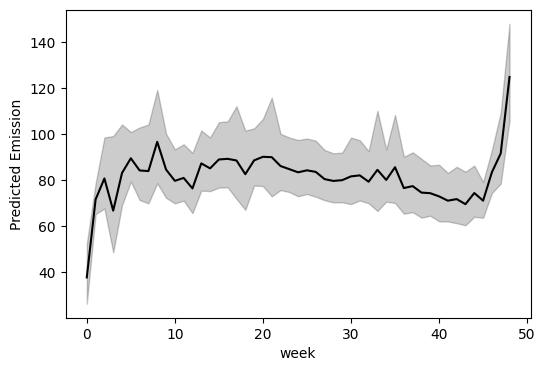

In [ ]:
palette = sb.color_palette("husl", len(test_data_copy['year'].unique()))
fig, ax = plt.subplots(figsize=(6,4))
# sb.lineplot(data=pred_df, x ='week', 
#             y = 'Predicted Emission',
#             hue='year',
#            palette = palette)

sb.lineplot(data=pred_df_scaled, x ='week', 
            y = 'Predicted Emission',
           palette = palette, color='k');

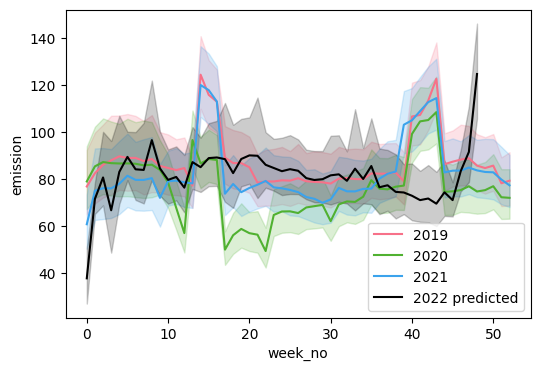

In [ ]:
palette = sb.color_palette("husl", len(train_data_copy['year'].unique()))
fig, ax = plt.subplots(figsize=(6,4))
sb.lineplot(data=train_data_copy, x ='week_no', 
            y = 'emission',
            hue='year',
           palette = palette);

sb.lineplot(data=pred_df_scaled, x ='week', 
            y = 'Predicted Emission',
           palette = palette, color='k', label='2022 predicted');

plt.legend();

# Final Project Report


## Objectives:
The primary objective of this project was to develop predictive models for estimating future emissions in Rwanda, specifically 2022, leveraging machine learning techniques. The goal was to explore various regression algorithms and identify the most effective model for accurately predicting 2022 emissions based on features collected from 2019 to 2021. This involved comprehensive data analysis, feature selection, and model evaluation to achieve high predictive accuracy while optimizing computational efficiency.

## Background:
The project centered on a Kaggle competition titled "Emission Prediction in Rwanda," intended as a class project. The dataset comprised numerous features related to emissions, energy consumption, and environmental factors, with data spanning locations like farmlands, cities, power plants. Initially, exploratory data analysis (EDA) was conducted to comprehend the data distribution, identify missing values, and understand feature correlations. Subsequently, preprocessing steps were applied, including dropping columns with excessive missing data (> 70,000 missing values) and scaling features for uniformity. The dataset was split into training and validation sets, with 25% reserved for validation purposes.

## Methodology:
The methodology involved employing multiple regression algorithms such as XGBoost, RandomForestRegressor, Ridge Regression, SGDRegressor, SVM, and Neural Network to predict emissions. Initially, models were trained using all 75 features, revealing RandomForestRegressor and XGBoost as the top-performing models with 98% and 95% accuracy, respectively. However, feature importance analysis indicated that only a subset of features significantly contributed to predictions, highlighting strong multicollinearity among the variables.

To address multicollinearity and enhance model performance, subsequent iterations involved training models using reduced feature sets (10 and 5 features). Surprisingly, while Neural Network witnessed a remarkable increase in accuracy from 19% to 89% with the reduced feature set, RandomForestRegressor and XGBoost maintained high accuracy performances of 98% and 97%, respectively. The final model selected for predicting emissions on the test dataset was RandomForestRegressor due to its consistent high accuracy.

## Results:
The feature importance analysis revealed that only a few variables were influential in predicting emissions, indicating a need for feature selection. The RandomForestRegressor and XGBoost models performed exceptionally well with the full feature set, showcasing high accuracies. However, reducing the feature space to 10 and 5 features led to an surge in accuracy for the Neural Network while maintaining high performance for RandomForestRegressor and XGBoost.
Upon deploying the RandomForestRegressor model on the test dataset, it demonstrated robust predictive power, showcasing its reliability in estimating emissions in the context of Rwanda.

## Conclusion:
In conclusion, this project successfully explored multiple ML regression algorithms to predict emissions in Rwanda. Through comprehensive feature analysis and model comparison, it was discovered that RandomForestRegressor and XGBoost excelled in accuracy using the full feature set. However, by strategically reducing the feature space, particularly to 10 and 5 significant features, an increase in accuracy was observed for the Neural Network. RandomForestRegressor emerged as the chosen model for predicting emissions in the test dataset due to its consistent high performance. This study highlights the importance of feature selection and model optimization in improving predictive capabilities while maintaining computational efficiency.


## THANK YOU!!